# Advanced Robotics  Project. 
## First Stage

In [1]:
import numpy as np
import roboticstoolbox as rtb
from spatialmath import *
from math import pi
import matplotlib.pyplot as plt
from matplotlib import cm
from rrt import RRT

np.set_printoptions(linewidth=100, formatter={'float': lambda x: f"{x:8.4g}" if abs(x) > 1e-10 else f"{0:8.4g}"})

%matplotlib widget 

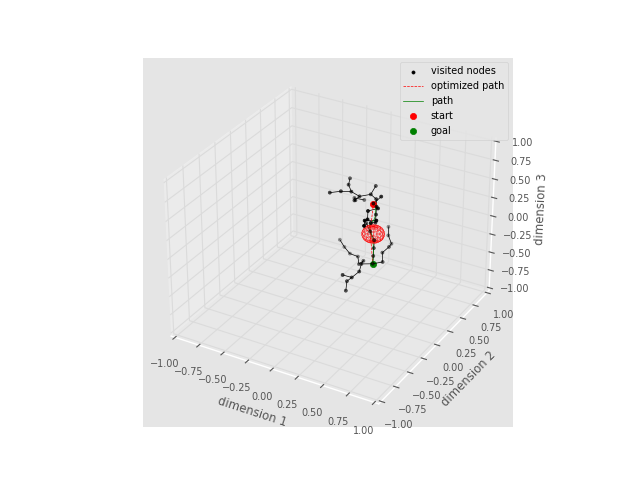

In [10]:
N = 3
# 2. Instantiate the RRT object with N, you may indicate the start and the goal configurations.
r = RRT(N, start=np.array([0.4,0 ,0.6]), goal=np.array([0.4,0 ,-0.2]))
# 3. Run the RRT planner (the default one uses bidirectional search)
r.runRRT(mode='dual')
# 4. Plot the results
r.plot()
path = r.get_path()

In [11]:
print(len(path))

200


PUMA560 Robot

In [11]:
robot = rtb.models.Puma560()
print(robot)

ERobot: Puma560 (by Unimation), 6 joints (RRRRRR), geometry, collision
┌─────┬────────┬───────┬────────┬───────────────────────────────────────────────────┐
│link │  link  │ joint │ parent │                ETS: parent to link                │
├─────┼────────┼───────┼────────┼───────────────────────────────────────────────────┤
│   0 │ link1  │       │ BASE   │                                                   │
│   1 │ link2  │     0 │ link1  │ SE3(0, 0, 0.5486; 90°, -0°, 0°) ⊕ Ry(q0)          │
│   2 │ link3  │     1 │ link2  │ SE3(0, 0.07493, 0.1422) ⊕ Rz(q1)                  │
│   3 │ link4  │     2 │ link3  │ SE3(0.4318, 0, 0.0254; 0°, -0°, 90°) ⊕ Rz(q2)     │
│   4 │ link5  │     3 │ link4  │ SE3(0.3518, 0, -0.0381; -90°, -0°, -90°) ⊕ Rz(q3) │
│   5 │ link6  │     4 │ link5  │ SE3(0, 0, 0.0803; 90°, -0°, 0°) ⊕ Rz(q4)          │
│   6 │ @link7 │     5 │ link6  │ SE3(0, 0.05334, 0; -90°, -0°, 0°) ⊕ Rz(q5)        │
└─────┴────────┴───────┴────────┴────────────────────────────────────

In [12]:
# DH parameters of the PUMA robot
robot = rtb.models.DH.Puma560()
print(robot.dhunique())

┌──────┬────────┐
│param │ value  │
├──────┼────────┤
│   d0 │ 0.6718 │
│   ⍺0 │ 1.571  │
│   a1 │ 0.4318 │
│   d2 │ 0.15   │
│   a2 │ 0.0203 │
│   ⍺2 │ -1.571 │
│   d3 │ 0.4318 │
│   ⍺3 │ 1.571  │
│   ⍺4 │ -1.571 │
└──────┴────────┘

None


In [13]:
# forward kinematics
Te = robot.fkine([0,0,0,0,0,0])  
print(Te)

   1         0         0         0.4521    
   0         1         0        -0.15      
   0         0         1         1.104     
   0         0         0         1         



In [5]:
# differential kinematics
Je = robot.jacobe([0,0,0,0,0,0])  
print(Je)

[[    0.15  -0.4318  -0.4318        0        0        0]
 [  0.4521        0        0        0        0        0]
 [       0   0.4521   0.0203        0        0        0]
 [       0        0        0        0        0        0]
 [       0       -1       -1        0       -1        0]
 [       1        0        0        1        0        1]]


In [6]:
#calculating torques using the reverse Newton-Euler approach
tau =robot.rne(robot.qn,np.zeros((6,)), np.zeros((6,)), fext=np.array([5,5,5,0,0,0]))
print(tau)

[   3.732    28.73    6.179        0  0.02825        0]


In [7]:
# inertia matrix
robot.inertia(robot.qz)

array([[   3.961,  -0.1627,  -0.1389,  0.00164, -0.0004321,    4e-05],
       [ -0.1627,    4.457,   0.3727,        0, 0.001886,        0],
       [ -0.1389,   0.3727,   0.9387,        0, 0.001886,        0],
       [ 0.00164,        0,        0,   0.1924,        0,    4e-05],
       [-0.0004321, 0.001886, 0.001886,        0,   0.1713,        0],
       [   4e-05,        0,        0,    4e-05,        0,   0.1941]])

In [8]:
# coriolis matrix
robot.coriolis(robot.qz, 0.5 * np.ones((6,)))


array([[ -0.4017,  -0.5513,  -0.2025, -0.000651, -0.001302,        0],
       [  0.2023,  -0.1937,  -0.3868,        0, -0.001953,        0],
       [  0.1987,    0.193, -2.923e-05,        0, -8.77e-05,        0],
       [       0,        0,        0,        0,        0,        0],
       [0.000651, 0.0006803, 5.846e-05,        0,        0,        0],
       [       0,        0,        0,        0,        0,        0]])

In [9]:
# gravity vector
robot.gravload(robot.qz)


array([       0,    37.48,   0.2489,        0,        0,        0])

Plot Puma robot

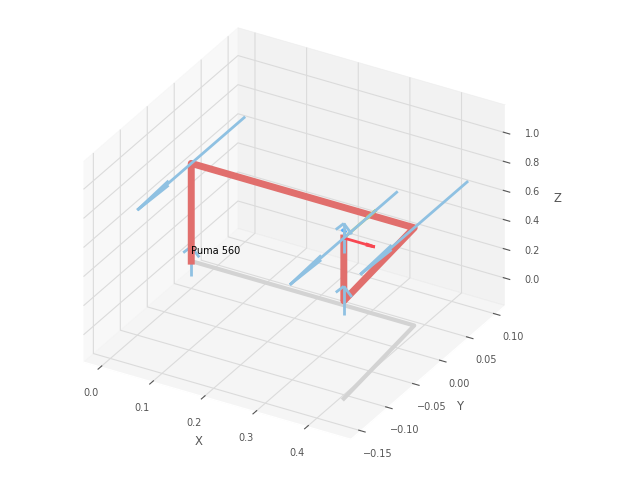

PyPlot3D backend, t = 0.05, scene:
  Puma 560

In [10]:
robot.plot(robot.qz,backend='pyplot')

Simulating the robot trajectory

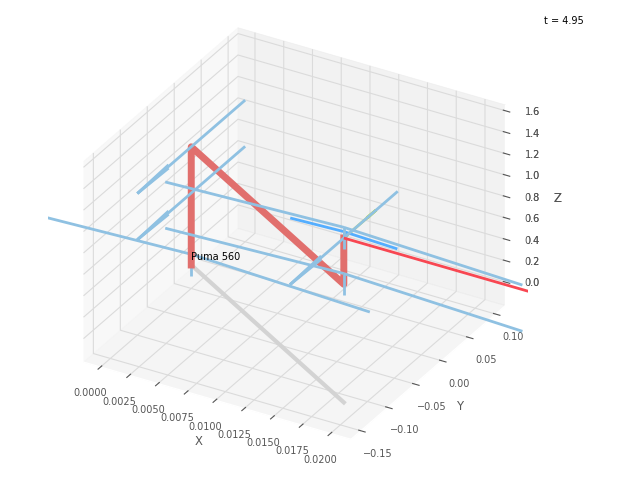

PyPlot3D backend, t = 4.99999999999999, scene:
  Puma 560

In [12]:
traj = rtb.jtraj(robot.qr, robot.qz, 100)
robot.plot(traj.q, backend='pyplot')

Simulation using Swift

In [13]:
import swift
import roboticstoolbox as rp
import spatialmath as sm
import numpy as np

env=swift.Swift()
env.launch(realtime=True)

puma =rtb.models.Puma560()

puma.q=puma.qz
# puma.qd=[0.1,0,0,0,0,0.1]

env.add(puma)

# for _ in range(100):
#     env.step(0.05)

# env.hold()

0

In [15]:
import swift
import roboticstoolbox as rp
import spatialmath as sm
import numpy as np

env=swift.Swift()
env.launch(realtime=True)

puma =rtb.models.Puma560()

puma.q=puma.qz
puma.qd=[0.1,0,0,0,0,0.1]

env.add(puma)

for _ in range(100):
    env.step(0.05)

# env.hold()

In [16]:
import swift
import numpy as np
import spatialmath as sm
import spatialgeometry as sg


env=swift.Swift()
env.launch(realtime=True)

puma =rtb.models.Puma560()

puma.q=puma.qz
puma.qd=[0.1,0,0,0,0,0.1]

env.add(puma)

Tep = puma.fkine(puma.q) * sm.SE3.Trans(0.1, 0.1, 0.2)

axes=sg.Axes(length=0.1,base=Tep)
env.add(axes)


arrived =False
dt=0.01

while not arrived:
    v, arrived=rtb.p_servo(puma.fkine(puma.q),Tep,gain=1,threshold=0.01)
    J=puma.jacobe(puma.q)
    puma.qd=np.linalg.pinv(J)@v
    env.step(dt)
# env.hold()

c:\Python310\lib\site-packages\spatialgeometry\geom\Shape.py:81: FutureWarning: base kwarg is deprecated, use pose instead
  warn("base kwarg is deprecated, use pose instead", FutureWarning)


# Calibration

$T=[T_xT_yT_zR_xR_yR_z]_b.R_z(q_1+\Delta q_1).[T_xT_yR_xR_y]_{L_1}.R_y(q_2+\Delta q_2).[T_xT_zR_xR_z]_{L_2}.
R_y(q_3+\Delta q_3).[T_xT_zR_xR_z]_{L_3}.R_z(q_4+\Delta q_4).[T_xT_yR_xR_y]_{L_4}.R_y(q_5+\Delta q_5).[T_xT_zR_xR_z]_{L_5}.
R_z(q_6+\Delta q_6).[T_xT_yR_xR_y]_{L_6}.[T_xT_yT_zR_xR_yR_z]_t$

reduced model

$T=[T_xT_yT_zR_xR_yR_z]_b.R_z(q_1+\cancel{\Delta q_1}).[T_xT_yR_x\cancel{R_y}]_{L_1}.R_y(q_2+\Delta q_2).[T_x\cancel{T_z}R_xR_z]_{L_2}.
R_y(q_3+\Delta q_3).[T_xT_zR_x\cancel{R_z}]_{L_3}.R_z(q_4+\Delta q_4).[T_xT_yR_x\cancel{R_y}]_{L_4}.R_y(q_5+\cancel{\Delta q_5}).[T_x\cancel{T_z}R_x\cancel{R_z}]_{L_5}.
R_z(q_6+\cancel{\Delta q_6}).[\cancel{T_x}\cancel{T_y}\cancel{R_x}\cancel{R_y}]_{L_6}.[T_xT_yT_z\cancel{R_x}\cancel{R_y}\cancel{R_z}]_t$

$T_{robot}=R_z(q_1).[T_xT_yR_x]_{L_1}.R_y(q_2+\Delta q_2).[T_xR_xR_z]_{L_2}.R_y(q_3+\Delta q_3).[T_xT_zR_x]_{L_3}.
R_z(q_4+\Delta q_4).[T_xT_yR_x]_{L_4}.R_y(q_5).[T_xR_x]_{L_5}.R_z(q_6)$

$\mathbf{\pi}=\{ p_{x1} \quad p_{y1} \quad \varphi_{x1} \quad \Delta q_2 \quad p_{x2} \quad \varphi_{x2} \quad \varphi_{z2}
\quad \Delta q_3 \quad p_{x3} \quad p_{z3} \quad \varphi_{x3} \quad \Delta q_4 \quad p_{x4} \quad p_{y4} \quad \varphi_{x4} \quad p_{x5} \quad \varphi_{x6}
\}$

$\mathbf{\pi}_0=\{ 0 \quad -d_2 \quad 0 \quad 0 
\quad d_3 \quad 0 \quad 0 \quad 0
\quad d_4 \quad d_5 \quad 0 \quad 0 
 \quad 0 \quad 0 \quad 0 \quad 0 
 \quad 0 
\}$

in case of $\mathbf{\pi}_0$

$T_{robot}=R_z(q_1).T_y(-d2).R_y(q_2).T_x(d3).R_y(q_3).T_x(d4).T_z(d5).
R_z(q_4).R_y(q_5).R_z(q_6)$

$T_{robot}=R_z(q_1).[T_xT_yR_x]_{L_1}.R_y(q_2+\Delta q_2).[T_xR_xR_z]_{L_2}.R_y(q_3+\Delta q_3).[T_xT_zR_x]_{L_3}.
R_z(q_4+\Delta q_4).[T_xT_yR_x]_{L_4}.R_y(q_5).[T_xR_x]_{L_5}.R_z(q_6)$

### The partial derivatives of $T$ with respect to the parameter $\pi_{k}$

$p_{x1}: T_{1}^{'}=T_{base}.[R_z(q1).H_{Tx}^{'}.T_y(-d2).R_y(q_2).T_x(d3).R_y(q_3).T_x(d4).T_z(d5).
R_z(q_4).R_y(q_5).R_z(q_6)].T_{tool}$

$p_{y1}: T_{2}^{'}=T_{base}.[R_z(q1).H_{Ty}^{'}.R_y(q_2).T_x(d3).R_y(q_3).T_x(d4).T_z(d5).
R_z(q_4).R_y(q_5).R_z(q_6)].T_{tool}$

$\varphi_{x1}: T_{3}^{'}=T_{base}.[R_z(q1).T_y(-d2).H_{Rx}^{'}.R_y(q_2).T_x(d3).R_y(q_3).T_x(d4).T_z(d5).
R_z(q_4).R_y(q_5).R_z(q_6)].T_{tool}$

$\Delta q_2: T_{4}^{'}=T_{base}.[R_z(q1).T_y(-d2).H_{Ry}^{'}.R_y(q_2).T_x(d3).R_y(q_3).T_x(d4).T_z(d5).
R_z(q_4).R_y(q_5).R_z(q_6)].T_{tool}$

$p_{x2}: T_{5}^{'}=T_{base}.[R_z(q1).T_y(-d2).R_y(q_2).H_{Tx}^{'}.R_y(q_3).T_x(d4).T_z(d5).
R_z(q_4).R_y(q_5).R_z(q_6)].T_{tool}$

$\varphi_{x2}: T_{6}^{'}=T_{base}.[R_z(q1).T_y(-d2).R_y(q_2).T_x(d3).H_{Rx}^{'}.R_y(q_3).T_x(d4).T_z(d5).
R_z(q_4).R_y(q_5).R_z(q_6)].T_{tool}$

$\varphi_{z2}: T_{7}^{'}=T_{base}.[R_z(q1).T_y(-d2).R_y(q_2).T_x(d3).H_{Rz}^{'}.R_y(q_3).T_x(d4).T_z(d5).
R_z(q_4).R_y(q_5).R_z(q_6)].T_{tool}$

$\Delta q_3: T_{8}^{'}=T_{base}.[R_z(q1).T_y(-d2).R_y(q_2).T_x(d3).H_{Ry}^{'}.R_y(q_3).T_x(d4).T_z(d5).
R_z(q_4).R_y(q_5).R_z(q_6)].T_{tool}$

$p_{x3}: T_{9}^{'}=T_{base}.[R_z(q1).T_y(-d2).R_y(q_2).T_x(d3).R_y(q_3).H_{Tx}^{'}.T_z(d5).
R_z(q_4).R_y(q_5).R_z(q_6)].T_{tool}$

$p_{z3}: T_{10}^{'}=T_{base}.[R_z(q1).T_y(-d2).R_y(q_2).T_x(d3).R_y(q_3).T_x(d4).H_{Tz}^{'}.
R_z(q_4).R_y(q_5).R_z(q_6)].T_{tool}$

$\varphi_{x3}: T_{11}^{'}=T_{base}.[R_z(q1).T_y(-d2).R_y(q_2).T_x(d3).R_y(q_3).T_x(d4).T_z(d5).
H_{Rx}^{'}.R_z(q_4).R_y(q_5).R_z(q_6)].T_{tool}$

$\Delta q_4: T_{12}^{'}=T_{base}.[R_z(q1).T_y(-d2).R_y(q_2).T_x(d3).R_y(q_3).T_x(d4).T_z(d5).
H_{Rz}^{'}.R_z(q_4).R_y(q_5).R_z(q_6)].T_{tool}$

$p_{x4}: T_{13}^{'}=T_{base}.[R_z(q1).T_y(-d2).R_y(q_2).T_x(d3).R_y(q_3).T_x(d4).T_z(d5)
.R_z(q_4).H_{Tx}^{'}.R_y(q_5).R_z(q_6)].T_{tool}$

$p_{y4}: T_{14}^{'}=T_{base}.[R_z(q1).T_y(-d2).R_y(q_2).T_x(d3).R_y(q_3).T_x(d4).T_z(d5)
.R_z(q_4).H_{Ty}^{'}.R_y(q_5).R_z(q_6)].T_{tool}$

$\varphi_{x4}: T_{15}^{'}=T_{base}.[R_z(q1).T_y(-d2).R_y(q_2).T_x(d3).R_y(q_3).T_x(d4).T_z(d5)
.R_z(q_4).H_{Rx}^{'}.R_y(q_5).R_z(q_6)].T_{tool}$

<!-- $\Delta q_5: T_{16}^{'}=T_{base}.[R_z(q1).T_y(-d2).R_y(q_2).T_x(d3).R_y(q_3).T_x(d4).T_z(d5).
R_z(q_4).H_{Ry}^{'}.R_y(q_5).R_z(q_6)].T_{tool}$ -->

$p_{x5}: T_{16}^{'}=T_{base}.[R_z(q1).T_y(-d2).R_y(q_2).T_x(d3).R_y(q_3).T_x(d4).T_z(d5)
.R_z(q_4).R_y(q_5).H_{Tx}^{'}.R_z(q_6)].T_{tool}$

$\varphi_{x5}: T_{17}^{'}=T_{base}.[R_z(q1).T_y(-d2).R_y(q_2).T_x(d3).R_y(q_3).T_x(d4).T_z(d5)
.R_z(q_4).R_y(q_5).H_{Rx}^{'}.R_z(q_6)].T_{tool}$

We get Jacobian column from the $T_{k}^{'}$ as following:

The position part:

$[J_{\pi}]_{1,k}=[T_{k}^{'}]_{1,4} \quad [J_{\pi}]_{2,k}=[T_{k}^{'}]_{2,4} \quad [J_{\pi}]_{3,k}=[T_{k}^{'}]_{3,4}$

The orientation part:

$[J_{\pi}]_{4,k}=[T_{k}^{'}.T^{-1}]_{3,2} \quad [J_{\pi}]_{5,k}=[T_{k}^{'}.T^{-1}]_{1,3} \quad [J_{\pi}]_{6,k}=[T_{k}^{'}.T^{-1}]_{2,1}$

### We will consider only links length and joint angles have a deflection

$\mathbf{\pi}= \{ p_{y1}  \quad \Delta q_2 \quad p_{x2} 
\quad \Delta q_3 \quad p_{x3} \quad p_{z3} \quad \Delta q_4
\}$

$\mathbf{\pi}_0=\{ -d_2 \quad 0 
\quad d_3 \quad 0 
\quad d_4 \quad d_5 \quad 0
\}$

$\Delta \Pi=(J_{a}^{T}.J_{a})^{-1}.J_{a}^{T}.\Delta P_{a}$

where

$J_a=[J_1 \quad J_2  \cdots	J_m]$  ,  $\Delta P_{a}=[\Delta P_{1} \quad \Delta P_{2} \cdots	\Delta P_{m}]$   

$\sum_{i=1}^{m} (J_i \Delta \Pi-\Delta P_i)^{T}(J_i \Delta \Pi-\Delta P_i)<\epsilon$

## Code 

In [17]:
d1 = 0.6718
d2 = 0.15
d3 = 0.4318
d4 = 0.0203
d5 = 0.4318


T_base=SE3.Tz(d1)

Tx=SE3.Tx
Ty=SE3.Ty
Tz=SE3.Tz
Rx=SE3.Rx
Ry=SE3.Ry
Rz=SE3.Rz

sin=np.sin
cos=np.cos
pi=np.pi

def Rxd(phi):
    rx = np.array([[ 0,         0,         0, 0],
                   [0, -sin(phi),  -cos(phi), 0],
                   [0, cos(phi), -sin(phi), 0],
                   [0,         0,         0, 0]])
    return SE3(rx, check=False)

def Ryd(phi):
    ry = np.array([[ -sin(phi), 0,  cos(phi), 0],
                   [0,         0,         0, 0],
                   [-cos(phi), 0, -sin(phi), 0],
                   [0,         0,         0, 0]])
    return SE3(ry, check=False)

def Rzd(phi):
    rz = np.array([[ -sin(phi),  -cos(phi), 0, 0],
                   [ cos(phi), -sin(phi), 0, 0],
                   [0,         0,         0, 0],
                   [0,         0,         0, 0]])
    return SE3(rz, check=False)
Txd0 = np.array([[0,   0,  0,  1],
                   [0,   0,  0,  0],
                   [0,   0,  0,  0],
                   [0,   0,  0,  0]])
Tyd0=np.array([[0,   0,  0,  0],
                   [0,   0,  0,  1],
                   [0,   0,  0,  0],
                   [0,   0,  0,  0]])
Tzd0= np.array([[0,   0,  0,  0],
                   [0,   0,  0,  0],
                   [0,   0,  0,  1],
                   [0,   0,  0,  0]])

Txd=SE3(Txd0, check=False)
Tyd=SE3(Tyd0, check=False)
Tzd=SE3(Tzd0, check=False)


Parametric Jacobian

In [18]:
d2_theo = d2-0.05*d2
d3_theo = d3-0.05*d3
d4_theo = d4-0.05*d4
d5_theo = d5-0.05*d5

def parameteric_jacobian(Q):
    q1,q2,q3,q4,q5,q6=Q
    
    TT=T_base*Rz(q1)*Ty(-d2_theo)*Ry(q2)*Tx(d3_theo)*Ry(q3)*Tx(d4_theo)*Tz(d5_theo)*Rz(q4)*Ry(q5)*Rz(q6)
    inv_TT=np.linalg.inv(TT)
    
    T1_=T_base*Rz(q1)*Tyd*Ry(q2)*Tx(d3_theo)*Ry(q3)*Tx(d4_theo)*Tz(d5_theo)*Rz(q4)*Ry(q5)*Rz(q6) # py1
    T1_np=np.array(T1_)
    T1rot=T1_np@inv_TT
    
    Jth1 = np.array([[T1_np[0,3], T1_np[1,3], T1_np[2,3], T1rot[2,1], T1rot[0,2], T1rot[1,0]]]).T


    T2_=T_base*Rz(q1)*Ty(-d2_theo)*Ryd(0)*Ry(q2)*Tx(d3_theo)*Ry(q3)*Tx(d4_theo)*Tz(d5_theo)*Rz(q4)*Ry(q5)*Rz(q6) # Dq2
    T2_np=np.array(T2_)
    T2rot=T2_np@inv_TT

    Jth2 = np.array([[T2_np[0,3], T2_np[1,3], T2_np[2,3], T2rot[2,1], T2rot[0,2], T2rot[1,0]]]).T

    T3_=T_base*Rz(q1)*Ty(-d2_theo)*Ry(q2)*Txd*Ry(q3)*Tx(d4_theo)*Tz(d5_theo)*Rz(q4)*Ry(q5)*Rz(q6) # px2
    T3_np=np.array(T3_)
    T3rot=T3_np@inv_TT

    Jth3 = np.array([[T3_np[0,3], T3_np[1,3], T3_np[2,3], T3rot[2,1], T3rot[0,2], T3rot[1,0]]]).T

    T4_=T_base*Rz(q1)*Ty(-d2_theo)*Ry(q2)*Tx(d3_theo)*Ryd(0)*Ry(q3)*Tx(d4_theo)*Tz(d5_theo)*Rz(q4)*Ry(q5)*Rz(q6) # Dq3
    T4_np=np.array(T4_)
    T4rot=T4_np@inv_TT

    Jth4 = np.array([[T4_np[0,3], T4_np[1,3], T4_np[2,3], T4rot[2,1], T4rot[0,2], T4rot[1,0]]]).T

    T5_=T_base*Rz(q1)*Ty(-d2_theo)*Ry(q2)*Tx(d3_theo)*Ry(q3)*Txd*Tz(d5_theo)*Rz(q4)*Ry(q5)*Rz(q6) # px3
    T5_np=np.array(T5_)
    T5rot=T5_np@inv_TT

    Jth5 = np.array([[T5_np[0,3], T5_np[1,3], T5_np[2,3], T5rot[2,1], T5rot[0,2], T5rot[1,0]]]).T

    T6_=T_base*Rz(q1)*Ty(-d2_theo)*Ry(q2)*Tx(d3_theo)*Ry(q3)*Tx(d4_theo)*Tzd*Rz(q4)*Ry(q5)*Rz(q6) # pz3
    T6_np=np.array(T6_)
    T6rot=T6_np@inv_TT

    Jth6 = np.array([[T6_np[0,3], T6_np[1,3], T6_np[2,3], T6rot[2,1], T6rot[0,2], T6rot[1,0]]]).T

    T7_=T_base*Rz(q1)*Ty(-d2_theo)*Ry(q2)*Tx(d3_theo)*Ry(q3)*Tx(d4_theo)*Tz(d5_theo)*Rzd(0)*Rz(q4)*Ry(q5)*Rz(q6) # Dq4
    T7_np=np.array(T7_)
    T7rot=T7_np@inv_TT

    Jth7 = np.array([[T7_np[0,3], T7_np[1,3], T7_np[2,3], T7rot[2,1], T7rot[0,2], T7rot[1,0]]]).T
 

    # T8_=T_base*Rz(q1)*Ty(-d2_theo)*Ry(q2)*Tx(d3_theo)*Ry(q3)*Tx(d4_theo)*Tz(d5_theo)*Rz(q4)*Ryd(0)*Ry(q5)*Rz(q6) # Dq5
    # T8_np=np.array(T8_)
    # T8rot=T8_np@inv_TT

    # Jth8 = np.array([[T8_np[0,3], T8_np[1,3], T8_np[2,3], T8rot[2,1], T8rot[0,2], T8rot[1,0]]]).T
    
    J_para=np.hstack((Jth1,Jth2,Jth3,Jth4,Jth5,Jth6,Jth7))
    return J_para

In [19]:


# ql = -pi/64
# qu =  pi/64
ql = -pi/18
qu =  pi/18

dq2=0.01
dq3=0.01
dq4=0.01

Delta_ps=[]
JJ=[]

for i in range(100):
    q1 =ql + (qu -ql)*(np.random.rand(1)[0])
    q2 =ql + (qu -ql)*(np.random.rand(1)[0])
    q3 =ql + (qu -ql)*(np.random.rand(1)[0])
    q4 = ql + (qu -ql)*(np.random.rand(1)[0])
    q5 = ql + (qu -ql)*(np.random.rand(1)[0])
    q6 = ql + (qu -ql)*(np.random.rand(1)[0])
    
    q2_theo=q2-dq2
    q3_theo=q3-dq3
    q4_theo=q4-dq4

    Te = robot.fkine([q1,q2,q3,q4,q5,q6])  

    #Te=T_base@SE3.Rz(q1)@SE3.Ty((-d2))@SE3.Ry((q2))@SE3.Tx(d3)@SE3.Ry((q3))@SE3.Tx(d4)@SE3.Tz(d5)@SE3.Rz(q4)@SE3.Ry((q5))@SE3.Rz(q6)

    real_pos=np.hstack((Te.t,Te.rpy(order='zyx')))
    real_pos=np.array([real_pos])

    Theoretical_model=T_base@SE3.Rz(q1)@SE3.Ty((-d2_theo))@SE3.Ry((-q2_theo))@SE3.Tx(d3_theo)@SE3.Ry((-q3_theo))@SE3.Tx(d4_theo)@SE3.Tz(d5_theo)@SE3.Rz(q4_theo)@SE3.Ry((-q5))@SE3.Rz(q6)
    
    Theoretical_model=np.hstack((Theoretical_model.t,Theoretical_model.rpy(order='zyx')))
    Theoretical_model=np.array([Theoretical_model])
    
    Q=[q1,-q2_theo,-q3_theo,q4_theo,-q5,q6]
    J=parameteric_jacobian(Q)

    delta_p=real_pos-Theoretical_model

    if i==0:
         Delta_ps=delta_p.T
         JJ=J
    else:
         Delta_ps=np.vstack((Delta_ps,delta_p.T))
         JJ=np.vstack((JJ,J))

d_pi=(np.linalg.pinv(JJ)@(Delta_ps))



Erorr=0
for j in range(100):
     dp_j=Delta_ps[j:j+6,0]
     dp_j=np.array([dp_j]).T
     J_j=JJ[j:j+6,:]
     Erorr+=(J_j@d_pi-dp_j).T@(J_j@d_pi-dp_j)

print("Erorr: ",Erorr)

print(f'pi_d2: {d_pi[0][0]}, delta_d2: {0.05*d2}')
print(f'pi_d3: {d_pi[2][0]}, delta_d3: {-0.05*d3}')
print(f'pi_d4: {d_pi[4][0]}, delta_d4: {-0.05*d4}')
print(f'pi_d5: {d_pi[5][0]}, delta_d5: {-0.05*d5}')
print(f'pi_q2: {d_pi[1][0]}, delta_q2: {dq2}')
print(f'pi_q3: {d_pi[3][0]}, delta_q3: {dq3}')
print(f'pi_q4: {d_pi[6][0]}, delta_q4: {-dq4}')

pi_d2=d_pi[0][0]
pi_d3=d_pi[2][0]
pi_d4=d_pi[4][0]
pi_d5=d_pi[5][0]
pi_q2=d_pi[1][0]
pi_q3=d_pi[3][0]
pi_q4=d_pi[6][0]




Erorr:  [[0.001948]]
pi_d2: -0.0075499999999999986, delta_d2: 0.0075
pi_d3: 0.021568220620677037, delta_d3: -0.02159
pi_d4: 0.0004511092766865318, delta_d4: -0.001015
pi_d5: 0.021533857258234115, delta_d5: -0.02159
pi_q2: -0.01058944277104251, delta_q2: 0.01
pi_q3: -0.009097201362999218, delta_q3: 0.01
pi_q4: 0.01015705531448638, delta_q4: -0.01


### Test the calibration results

In [20]:
t = np.linspace(0, 2*pi ,200)


X_real=[]
Y_real=[]
Z_real=[]

X_uncal=[]
Y_uncal=[]
Z_uncal=[]


X_cor=[]
Y_cor=[]
Z_cor=[]


for i in range(len(t)):
    x = 0.5*cos(t[i])
    y = 0.5*sin(t[i])
    z=0.5
    TT= np.array([[1,   0,  0,  x],
                   [0,   1,  0,  y],
                   [0,   0,  1,  z],
                   [0,   0,  0,  0]])

    TT=SE3(TT, check=False)
    real_sol = robot.ikine_a(TT)
    

    q1,q2,q3,q4,q5,q6=real_sol.q

    X_real.append(robot.fkine([q1,q2,q3,q4,q5,q6]).t[0])
    Y_real.append(robot.fkine([q1,q2,q3,q4,q5,q6]).t[1])
    Z_real.append(robot.fkine([q1,q2,q3,q4,q5,q6]).t[2])
    
    q2_theo=q2-dq2
    q3_theo=q3-dq3
    q4_theo=q4-dq4

    Theoretical_model=T_base@SE3.Rz(q1)@SE3.Ty((-d2_theo))@SE3.Ry((-q2_theo))@SE3.Tx(d3_theo)@SE3.Ry((-q3_theo))@SE3.Tx(d4_theo)@SE3.Tz(d5_theo)@SE3.Rz(q4_theo)@SE3.Ry((-q5))@SE3.Rz(q6)
    X_uncal.append(Theoretical_model.t[0])
    Y_uncal.append(Theoretical_model.t[1])
    Z_uncal.append(Theoretical_model.t[2])

    Coorected_model=T_base@SE3.Rz(q1)@SE3.Ty(-(d2_theo-pi_d2))@SE3.Ry(-(q2_theo-pi_q2))@SE3.Tx(d3_theo+pi_d3)@SE3.Ry(-(q3_theo-pi_q3))@SE3.Tx(d4_theo+pi_d4)@SE3.Tz(d5_theo+pi_d5)@SE3.Rz(q4_theo+pi_q4)@SE3.Ry((-q5))@SE3.Rz(q6)
    # Coorected_model=T_base@SE3.Rz(q1)@SE3.Ty(-(d2))@SE3.Ry(-(q2))@SE3.Tx(d3)@SE3.Ry(-(q3))@SE3.Tx(d4)@SE3.Tz(d5)@SE3.Rz(q4)@SE3.Ry((-q5))@SE3.Rz(q6)

    X_cor.append(Coorected_model.t[0])
    Y_cor.append(Coorected_model.t[1])
    Z_cor.append(Coorected_model.t[2])




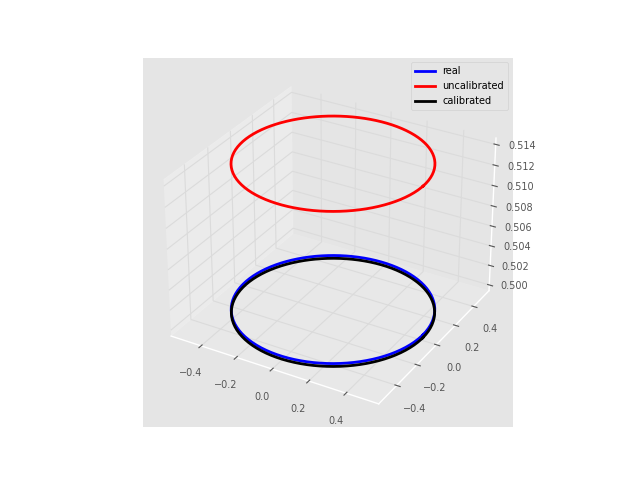

In [21]:
from matplotlib.pyplot import *

fig = plt.figure()
ax = plt.axes(projection='3d')


ax.plot3D(X_real, Y_real,Z_real,'b',label=r'real', linewidth=2.0)
ax.plot3D(X_uncal, Y_uncal,Z_uncal,'r',label=r'uncalibrated', linewidth=2.0)
ax.plot3D(X_cor, Y_cor,Z_cor,'k',label=r'calibrated', linewidth=2.0)
ax.legend()


In [22]:


# ql = -pi/64
# qu =  pi/64

# dq2=0.01
# dq3=0.01
# dq4=0.01

# #
# Delta_ps=[]
# JJ=[]
# # criteira=0
# for i in range(100):
#     q1 =ql + (qu -ql)*(np.random.rand(1)[0])
#     q2 =ql + (qu -ql)*(np.random.rand(1)[0])
#     q3 =ql + (qu -ql)*(np.random.rand(1)[0])
#     q4 = ql + (qu -ql)*(np.random.rand(1)[0])
#     q5 = ql + (qu -ql)*(np.random.rand(1)[0])
#     q6 = ql + (qu -ql)*(np.random.rand(1)[0])
    
#     q2_theo=q2-dq2
#     q3_theo=q3-dq3
#     q4_theo=q4-dq4

#     #Te = robot.fkine([q1,q2,q3,q4,q5,q6])  

#     Te=T_base@SE3.Rz(q1)@SE3.Ty((-d2))@SE3.Ry((q2))@SE3.Tx(d3)@SE3.Ry((q3))@SE3.Tx(d4)@SE3.Tz(d5)@SE3.Rz(q4)@SE3.Ry((q5))@SE3.Rz(q6)

#     real_pos=np.hstack((Te.t,Te.rpy(order='zyx')))
#     real_pos=np.array([real_pos])

#     Theory_model=T_base@SE3.Rz(q1)@SE3.Ty((-d2_theo))@SE3.Ry((q2_theo))@SE3.Tx(d3_theo)@SE3.Ry((q3_theo))@SE3.Tx(d4_theo)@SE3.Tz(d5_theo)@SE3.Rz(q4_theo)@SE3.Ry((q5))@SE3.Rz(q6)
    
#     Theory_pos=np.hstack((Theory_model.t,Theory_model.rpy(order='zyx')))
#     Theory_pos=np.array([Theory_pos])
    
#     Q=[q1,q2_theo,q3_theo,q4_theo,q5_theo,q6]
#     J=parameteric_jacobian(Q)

#     delta_p=real_pos-Theory_pos

#     if i==0:
#          Delta_ps=delta_p.T
#          JJ=J
#     else:
#          Delta_ps=np.vstack((Delta_ps,delta_p.T))
#          JJ=np.vstack((JJ,J))

# d_pi=(np.linalg.pinv(JJ)@(Delta_ps))

# # print(delta_p)
# # print(Delta_ps[-7:-1,0])

# E=0
# for j in range(100):
#      dp_j=Delta_ps[j:j+6,0]
#      dp_j=np.array([dp_j]).T
#      # print(dp_j)
#      J_j=JJ[j:j+6,:]
#      # print((J_j@d_pi-dp_j))
#      E+=(J_j@d_pi-dp_j).T@(J_j@d_pi-dp_j)
#      # print(Delta_ps[j:j+6,0])
#      # print(JJ[j:j+6,:])
#      # print(JJ[j:j+6,:]@d_pi)
# print(E)
# print(f'pi_d2: {d_pi[0][0]}, delta_d2: {0.05*d2}')
# print(f'pi_d3: {d_pi[2][0]}, delta_d3: {-0.05*d3}')
# print(f'pi_d4: {d_pi[4][0]}, delta_d4: {-0.05*d4}')
# print(f'pi_d5: {d_pi[5][0]}, delta_d5: {-0.05*d5}')
# print(f'pi_q2: {d_pi[1][0]}, delta_q2: {-dq2}')
# print(f'pi_q3: {d_pi[3][0]}, delta_q3: {-dq3}')
# print(f'pi_q4: {d_pi[6][0]}, delta_q4: {-dq4}')





In [ ]:
#def parameteric_jacobian(Q):
#     q1,q2,q3,q4,q5,q6=Q
    
#     T1_=T_base*Rz(q1)*Txd*Ty(-d2)*Ry(q2)*Tx(d3)*Ry(q3)*Tx(d4)*Tz(d5)*Rz(q4)*Ry(q5)*Rz(q6) # px1
#     T1_np=np.array(T1_)
#     Jth1 = np.array([[T1_np[0,3], T1_np[1,3], T1_np[2,3], T1_np[2,1], T1_np[0,2], T1_np[1,0]]]).T
    
#     T2_=T_base*Rz(q1)*Tyd*Ry(q2)*Tx(d3)*Ry(q3)*Tx(d4)*Tz(d5)*Rz(q4)*Ry(q5)*Rz(q6) # py1
#     T2_np=np.array(T2_)
#     Jth2 = np.array([[T2_np[0,3], T2_np[1,3], T2_np[2,3], T2_np[2,1], T2_np[0,2], T2_np[1,0]]]).T

#     T3_=T_base*Rz(q1)*Ty(-d2)*Rxd(0)*Ry(q2)*Tx(d3)*Ry(q3)*Tx(d4)*Tz(d5)*Rz(q4)*Ry(q5)*Rz(q6) # phi x1
#     T3_np=np.array(T3_)
#     Jth3 = np.array([[T3_np[0,3], T3_np[1,3], T3_np[2,3], T3_np[2,1], T3_np[0,2], T3_np[1,0]]]).T

#     T4_=T_base*Rz(q1)*Ty(-d2)*Ryd(0)*Ry(q2)*Tx(d3)*Ry(q3)*Tx(d4)*Tz(d5)*Rz(q4)*Ry(q5)*Rz(q6) # Dq2
#     T4_np=np.array(T4_)
#     Jth4 = np.array([[T4_np[0,3], T4_np[1,3], T4_np[2,3], T4_np[2,1], T4_np[0,2], T4_np[1,0]]]).T

#     T5_=T_base*Rz(q1)*Ty(-d2)*Ry(q2)*Txd*Ry(q3)*Tx(d4)*Tz(d5)*Rz(q4)*Ry(q5)*Rz(q6) # px2
#     T5_np=np.array(T5_)
#     Jth5 = np.array([[T5_np[0,3], T5_np[1,3], T5_np[2,3], T5_np[2,1], T5_np[0,2], T5_np[1,0]]]).T

#     T6_=T_base*Rz(q1)*Ty(-d2)*Ry(q2)*Tx(d3)*Rxd(0)*Ry(q3)*Tx(d4)*Tz(d5)*Rz(q4)*Ry(q5)*Rz(q6) # phi x2
#     T6_np=np.array(T6_)
#     Jth6 = np.array([[T6_np[0,3], T6_np[1,3], T6_np[2,3], T6_np[2,1], T6_np[0,2], T6_np[1,0]]]).T

#     T7_=T_base*Rz(q1)*Ty(-d2)*Ry(q2)*Tx(d3)*Rzd(0)*Ry(q3)*Tx(d4)*Tz(d5)*Rz(q4)*Ry(q5)*Rz(q6) # phi z2
#     T7_np=np.array(T7_)
#     Jth7 = np.array([[T7_np[0,3], T7_np[1,3], T7_np[2,3], T7_np[2,1], T7_np[0,2], T7_np[1,0]]]).T

#     T8_=T_base*Rz(q1)*Ty(-d2)*Ry(q2)*Tx(d3)*Ryd(0)*Ry(q3)*Tx(d4)*Tz(d5)*Rz(q4)*Ry(q5)*Rz(q6) # Dq3
#     T8_np=np.array(T8_)
#     Jth8 = np.array([[T8_np[0,3], T8_np[1,3], T8_np[2,3], T8_np[2,1], T8_np[0,2], T8_np[1,0]]]).T

#     T9_=T_base*Rz(q1)*Ty(-d2)*Ry(q2)*Ry(q3)*Txd*Tz(d5)*Rz(q4)*Ry(q5)*Rz(q6) # px3
#     T9_np=np.array(T9_)
#     Jth9 = np.array([[T9_np[0,3], T9_np[1,3], T9_np[2,3], T9_np[2,1], T9_np[0,2], T9_np[1,0]]]).T

#     T10_=T_base*Rz(q1)*Ty(-d2)*Ry(q2)*Tx(d3)*Ry(q3)*Tx(d4)*Tzd*Rz(q4)*Ry(q5)*Rz(q6) # pz3
#     T10_np=np.array(T10_)
#     Jth10 = np.array([[T10_np[0,3], T10_np[1,3], T10_np[2,3], T10_np[2,1], T10_np[0,2], T10_np[1,0]]]).T

#     T11_=T_base*Rz(q1)*Ty(-d2)*Ry(q2)*Tx(d3)*Ry(q3)*Tx(d4)*Tz(d5)*Rxd(0)*Rz(q4)*Ry(q5)*Rz(q6) # phi x3
#     T11_np=np.array(T11_)
#     Jth11 = np.array([[T11_np[0,3], T11_np[1,3], T11_np[2,3], T11_np[2,1], T11_np[0,2], T11_np[1,0]]]).T

#     T12_=T_base*Rz(q1)*Ty(-d2)*Ry(q2)*Tx(d3)*Ry(q3)*Tx(d4)*Tz(d5)*Rzd(0)*Rz(q4)*Ry(q5)*Rz(q6) # Dq4
#     T12_np=np.array(T12_)
#     Jth12 = np.array([[T12_np[0,3], T12_np[1,3], T12_np[2,3], T12_np[2,1], T12_np[0,2], T12_np[1,0]]]).T
 
#     T13_=T_base*Rz(q1)*Ty(-d2)*Ry(q2)*Tx(d3)*Ry(q3)*Tx(d4)*Tz(d5)*Rz(q4)*Txd*Ry(q5)*Rz(q6) # px4 
#     T13_np=np.array(T13_)
#     Jth13 = np.array([[T13_np[0,3], T13_np[1,3], T13_np[2,3], T13_np[2,1], T13_np[0,2], T13_np[1,0]]]).T

#     T14_=T_base*Rz(q1)*Ty(-d2)*Ry(q2)*Tx(d3)*Ry(q3)*Tx(d4)*Tz(d5)*Rz(q4)*Tyd*Ry(q5)*Rz(q6) # py4 
#     T14_np=np.array(T14_)
#     Jth14 = np.array([[T14_np[0,3], T14_np[1,3], T14_np[2,3], T14_np[2,1], T14_np[0,2], T14_np[1,0]]]).T

#     T15_=T_base*Rz(q1)*Ty(-d2)*Ry(q2)*Tx(d3)*Ry(q3)*Tx(d4)*Tz(d5)*Rz(q4)*Rxd(0)*Ry(q5)*Rz(q6) # phi x4 
#     T15_np=np.array(T15_)
#     Jth15 = np.array([[T15_np[0,3], T15_np[1,3], T15_np[2,3], T15_np[2,1], T15_np[0,2], T15_np[1,0]]]).T


#     T16_=T_base*Rz(q1)*Ty(-d2)*Ry(q2)*Tx(d3)*Ry(q3)*Tx(d4)*Tz(d5)*Rz(q4)*Ryd(0)*Ry(q5)*Rz(q6) # Dq5
#     T16_np=np.array(T16_)
#     Jth16 = np.array([[T16_np[0,3], T16_np[1,3], T16_np[2,3], T16_np[2,1], T16_np[0,2], T16_np[1,0]]]).T

#     T17_=T_base*Rz(q1)*Ty(-d2)*Ry(q2)*Tx(d3)*Ry(q3)*Tx(d4)*Tz(d5)*Rz(q4)*Ry(q5)*Txd*Rz(q6) # px5
#     T17_np=np.array(T17_)
#     Jth17 = np.array([[T17_np[0,3], T17_np[1,3], T17_np[2,3], T17_np[2,1], T17_np[0,2], T17_np[1,0]]]).T

#     T18_=T_base*Rz(q1)*Ty(-d2)*Ry(q2)*Tx(d3)*Ry(q3)*Tx(d4)*Tz(d5)*Rz(q4)*Ry(q5)*Rxd(0)*Rz(q6) # phi x5 
#     T18_np=np.array(T18_)
#     Jth18 = np.array([[T18_np[0,3], T18_np[1,3], T18_np[2,3], T18_np[2,1], T18_np[0,2], T18_np[1,0]]]).T
    
#     J_para=np.hstack((Jth1,Jth2,Jth3,Jth4,Jth5,Jth6,Jth7,Jth8,Jth9,Jth10,Jth11,Jth12,Jth13,Jth14,Jth15,Jth16,Jth17,Jth18))
#     #print(J@J.T)
#     return J_para

Path planning

Potential field

In [23]:
T = robot.fkine_all([0, 0, 0, 0, 0, 0])


In [24]:
qCurr=robot.qz
goal=robot.qr

In [25]:
timeout = 1000; #the planner times out in 1000 steps
rConToPar = 30; #threshold for switching from conic potential well to parabolic potential well
zetas =  [0.005, 0.005, 0.01, 0.01, 0.01,0.01]; #attraction gains
rho0 = 200; #maximum distance for repulsive force to act
eta = [1000,1000,1000,1000,1000,2000]*100 #repulsion gains
alp = 0.01 # %step size alpha
tolToGoal = 0.3 # %distance needed to be from goal to declare that the planner has completed
epsilon = 0.005 # %minimum step; if step falls below this threshold for an extended amount of time, we declare the robot in a local min

# obj_list = map.obstacles #%pull obstacle list from map

currloc = robot.fkine_all(qCurr) #current location in workspace coords
print(currloc)
netfr = np.zeros((1,3)) # %initialize force vector
goalloc = robot.fkine_all(goal) #%goal location in workspace coords 
tau = np.zeros((1,6)) # %initialize torque matrix 


print(tau)


[0] =
   1         0         0         0         
   0         1         0         0         
   0         0         1         0         
   0         0         0         1         
[1] =
   1         0         0         0         
   0         0        -1         0         
   0         1         0         0.6718    
   0         0         0         1         
[2] =
   1         0         0         0.4318    
   0         0        -1         0         
   0         1         0         0.6718    
   0         0         0         1         
[3] =
   1         0         0         0.4521    
   0         1         0        -0.15      
   0         0         1         0.6718    
   0         0         0         1         
[4] =
   1         0         0         0.4521    
   0         0        -1        -0.15      
   0         1         0         1.104     
   0         0         0         1         
[5] =
   1         0         0         0.4521    
   0         1         0        -0.15   

In [26]:
# differential kinematics
Je = robot.jacobe([0,0,0,0,0,0])  
print(Je)
Je[:,0:1]

[[    0.15  -0.4318  -0.4318        0        0        0]
 [  0.4521        0        0        0        0        0]
 [       0   0.4521   0.0203        0        0        0]
 [       0        0        0        0        0        0]
 [       0       -1       -1        0       -1        0]
 [       1        0        0        1        0        1]]


array([[    0.15],
       [  0.4521],
       [       0],
       [       0],
       [       0],
       [       1]])

In [27]:
Fa=[]
Je = robot.jacobe(qCurr)  

for i in range(1,7): #%make a separate potential field for every joint
    dist_a = currloc[i].t - goalloc[i].t # %calcualte distance in workspace coordaintes from current position to goal position
    #print(currloc[i].t)
    # print(goalloc[i].t)

    # print(dist_a)
    if np.linalg.norm(dist_a) > rConToPar : #if the robot is far away from the goal, use a conic attractive field
        Fa=(-dist_a/np.linalg.norm(dist_a)) # %Calculate conic attractive force
    else: #%else, use a parabolic attractive field
        Fa=(-zetas[i-1]*dist_a) #Calculate parabolic attractive force
    Jac=Je[0:3,0:i]
    Fa_np=np.array(Fa)
    # print(Jac.T)
    # print(Fa_np.T)

    # Jac=Je[0:3,0:i]
    # dQ=Jac.T@Fa_np.T
    #dQ=np.linalg.pinv(Jac)@Fa_np.T
    dQ=(Jac).T@Fa_np.T

    print("1",dQ)
# F_total=
# qLog(time,:) = qCurr + alp*Fa/np.linalg.norm(Fa)#; %execute gradient descent

#     for j = 1:size(obj_list,1) %for every obstacle
#         [dist, vec] =  distPointToBox(currloc(i,:),obj_list(j,:));
#         if dist > rho0 #%if too far away from obstacle
#             Fr(i,:) = zeros(1,3); #%set repulsive force to 0
#         else # %if close enough to obstacle
#             Fr(i,:) = -eta(i)*((1/dist - (1/rho0))*(1/dist^2)*vec/norm(vec)); %calculate repulsive force
        
#         netfr = netfr+Fr(i,:); %get net repulsive force (sum of repulsive forces from all obstacles)
#     end
#     J = calcJacobian_group37(qCurr, i+1, robot); %get jacobian based on current configuration
#     Jv = J(1:3, :); %extract Jv from J
#     netf = netfr+Fa(i,:); %get net force (attractive + repulsive)
#     taui = forceToTorque_11(netf, Jv); %calculate torque from force
#     tau(i,:) = [taui.', zeros(1,6-length(taui))]; %if needed, add zeros to end of torque vector to make it 1x6, and append to torque matrix
# end

# taunet = sum(tau); %collapse torque matrix down to a vector (all 6 joint 1 torques are added, all 5 joint 2 torques, all 4 joint 3, etc)
# qLog(time,:) = qCurr + alp*taunet/norm(taunet); %execute gradient descent


1 [       0]
1 [-0.000324 0.001908]
1 [-0.0006479 0.003817 0.001952]
1 [-0.0006479 0.003817 0.001952        0]
1 [-0.0006479 0.003817 0.001952        0        0]
1 [-0.0006479 0.003817 0.001952        0        0        0]


In [80]:
from scipy.spatial import distance
def f_att(q,q_f, zeta, d = 0.1):
    
    d2f =  distance.euclidean(q,q_f) 

    if d2f <= d : 
        f_at = -zeta * (q-q_f)

    else: 
        f_at = -(d*zeta*(q-q_f))/d2f 

    return f_at 



def f_rep(q,obs, nu, rho=0.01): 

    center,radius = obs
    d2o =  distance.euclidean(q,center) 
    d2b = d2o - radius

    dgrad = (q-center)/d2o
    # print(d2o)

    if d2o <= rho : 
        f_rep = nu*((1/d2b)-(1/rho))*(1/d2b**2)*dgrad
    else: 
        f_rep = np.zeros((1,3))
        f_rep=f_rep[0]

    
    return f_rep 

In [25]:
Fa=[]
Je = robot.jacobe(qCurr)  
q_obs = np.array([0.4, -0.1, 1])
DD=[]
for i in range(1,7): #%make a separate potential field for every joint
    dist_a = currloc[i].t - goalloc[i].t # %calcualte distance in workspace coordaintes from current position to goal position
    #print(currloc[i].t)
    # print(goalloc[i].t)
    Fa=f_att(currloc[i].t,goalloc[i].t,zeta=3, d=0.3)
    # print(currloc[i].t)

    # print(dist_a)
    #if np.linalg.norm(dist_a) > rConToPar : #if the robot is far away from the goal, use a conic attractive field
    #    Fa=(-dist_a/np.linalg.norm(dist_a)) # %Calculate conic attractive force
    #else: #%else, use a parabolic attractive field
    #    Fa=(-zetas[i-1]*dist_a) #Calculate parabolic attractive force
    #Jac=Je[0:3,0:i]
    # Fa_np=np.array(Fa)
    F_rep = f_rep(currloc[i].t,[q_obs, 0.2], nu =5, rho=0.3)
    # print(F_rep)
    Fa_np=Fa-F_rep
    # print(Fa_np)
    # print(Fa_np.T)

    Jac=Je[0:3,0:i]
    # dQ=Jac.T@Fa_np.T
    dQ=np.linalg.pinv(Jac)@Fa_np.T
    # dQ=(Jac).T@Fa_np.T
    # print("1",dQ)
    # print(np.zeros((1,6-i)))
    dQq=np.hstack((dQ,np.zeros((1,6-i))[0]))
    DD.append(dQq)
    print("1",dQq)
to=[]
DD=np.array(DD)
for i in range(6):
    # print(DD[:,0])
    to.append(np.sum(DD[:,i]))
# print(DD[:][2]) 
print(to)
to=np.array(to)
alp=0.1
qLog = qCurr + alp*to/np.linalg.norm(to)#; %execute gradient descent
print(qLog)
# F_total=
# qLog(time,:) = qCurr + alp*Fa/np.linalg.norm(Fa)#; %execute gradient descent

#     for j = 1:size(obj_list,1) %for every obstacle
#         [dist, vec] =  distPointToBox(currloc(i,:),obj_list(j,:));
#         if dist > rho0 #%if too far away from obstacle
#             Fr(i,:) = zeros(1,3); #%set repulsive force to 0
#         else # %if close enough to obstacle
#             Fr(i,:) = -eta(i)*((1/dist - (1/rho0))*(1/dist^2)*vec/norm(vec)); %calculate repulsive force
        
#         netfr = netfr+Fr(i,:); %get net repulsive force (sum of repulsive forces from all obstacles)
#     end
#     J = calcJacobian_group37(qCurr, i+1, robot); %get jacobian based on current configuration
#     Jv = J(1:3, :); %extract Jv from J
#     netf = netfr+Fa(i,:); %get net force (attractive + repulsive)
#     taui = forceToTorque_11(netf, Jv); %calculate torque from force
#     tau(i,:) = [taui.', zeros(1,6-length(taui))]; %if needed, add zeros to end of torque vector to make it 1x6, and append to torque matrix
# end

# taunet = sum(tau); %collapse torque matrix down to a vector (all 6 joint 1 torques are added, all 5 joint 2 torques, all 4 joint 3, etc)
# qLog(time,:) = qCurr + alp*taunet/norm(taunet); %execute gradient descent


1 [       0        0        0        0        0        0]
1 [-0.01037    1.437        0        0        0        0]
1 [       0    1.405  0.06929        0        0        0]
1 [-1.365e+04 3.051e+04 -5.013e+04        0        0        0]
1 [-1.365e+04 3.051e+04 -5.013e+04        0        0        0]
1 [-1.365e+04 3.051e+04 -5.013e+04        0        0        0]
[-40946.25855073116, 91540.17561285377, -150388.81519405002, 0.0, 0.0, 0.0]
[-0.02265  0.05064  -0.0832        0        0        0]


[       0    1.571   -1.571        0        0        0]


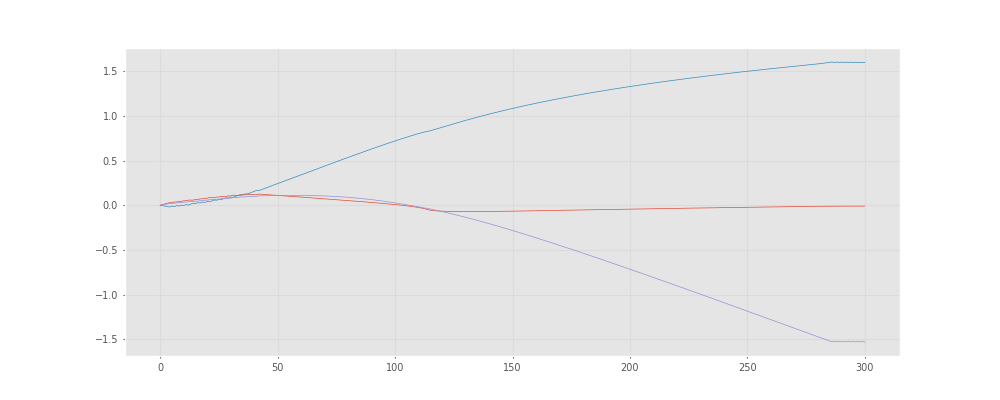

In [26]:
N = 300

q_sol = np.empty((6,N+1))
f_sol = np.empty((6,N+1))
q_alter = np.empty((6,N+1))

alpha = 0.001
q_sol[:,0] = robot.qz
q_alter[:,0]=robot.qz

qCurr=robot.qz
goal=robot.qr
currloc = robot.fkine_all(qCurr) #current location in workspace coords
# print(currloc)
netfr = np.zeros((1,3)) # %initialize force vector
goalloc = robot.fkine_all(goal)

for j in range(0,N):
    Fa=[]
    Je = robot.jacobe(q_sol[:,j])  
    q_obs = np.array([0.4, -0.3, 1.2])
    DD=[]
    currloc = robot.fkine_all(q_sol[:,j]) #current location in workspace coords
    goalloc = robot.fkine_all(goal)

    for i in range(1,7): #%make a separate potential field for every joint
        dist_a = currloc[i].t - goalloc[i].t # %calcualte distance in workspace coordaintes from current position to goal position
        # print(currloc[i].t)
        # print(goalloc[i].t)
        Fa=f_att(currloc[i].t,goalloc[i].t,zeta=10, d=0.3)
        # print(currloc[i].t)


        F_rep = f_rep(currloc[i].t,[q_obs, 0.1], nu =5, rho=0.2)
        # print(F_rep)
        Fa_np=Fa+F_rep
        # print(Fa_np)
        # print(Fa_np.T)

        Jac=Je[0:3,0:i]
        # dQ=Jac.T@Fa_np.T
        dQ=np.linalg.pinv(Jac)@Fa_np.T
        # dQ=(Jac).T@Fa_np.T
        # print("1",dQ)
        # print(np.zeros((1,6-i)))
        dQq=np.hstack((dQ,np.zeros((1,6-i))[0]))
        DD.append(dQq)
        # print("1",dQq)
        to=[]
    DD=np.array(DD)
    for i in range(6):
            # print(DD[:,0])
        to.append(np.sum(DD[:,i]))
        # print(DD[:][2]) 
        # print(to)
    to=np.array(to)
    alp=0.01
    #np.array([0.3,-0.3,0,0,0,0])
    step=alp*(to)/np.linalg.norm(to)#; %execute gradient descent
    # print(step)
    q_sol[:,j+1] = q_sol[:,j]+step 
    # print(q_sol[:,j+1])

print(goal)
# print(q_sol[0][0])    
plt.figure(figsize=(10,4))  
plt.plot(q_sol[0])
plt.plot(q_sol[1])
plt.plot(q_sol[2])

# plt.figure(figsize=(10,4))  
# plt.plot(q_alter[0])
# plt.plot(q_alter[1])
# plt.plot(q_alter[2])

# plt.figure(figsize=(10,4))  
# plt.plot(f_sol[0])
# plt.plot(f_sol[1])
# plt.plot(f_sol[2])

In [28]:
X_cor=[]
Y_cor=[]
Z_cor=[]
for i in range(len(q_sol[0])):        
    Coorected_model=robot.fkine([q_sol[0,i],q_sol[1,i],q_sol[2,i],0,0,0])
    # Coorected_model=T_base@SE3.Rz(q1)@SE3.Ty(-(d2))@SE3.Ry(-(q2))@SE3.Tx(d3)@SE3.Ry(-(q3))@SE3.Tx(d4)@SE3.Tz(d5)@SE3.Rz(q4)@SE3.Ry((-q5))@SE3.Rz(q6)

    X_cor.append(Coorected_model.t[0])
    Y_cor.append(Coorected_model.t[1])
    Z_cor.append(Coorected_model.t[2])
    

fig = plt.figure()
ax = plt.axes(projection='3d')


ax.plot3D(X_cor, Y_cor,Z_cor,'k',label=r'calibrated', linewidth=2.0)

ax.legend()

import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D


x_center, y_center, z_center = 0.4, -0.3, 1.2
radius = 0.1

u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
x = x_center + radius * np.cos(u) * np.sin(v)
y = y_center + radius * np.sin(u) * np.sin(v)
z = z_center + radius * np.cos(v)
ax.plot_wireframe(x, y, z, color='r')
ax.set_xlim(0, 1)
ax.set_ylim(-0.5, 1)
ax.set_zlim(1, 2)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()


NameError: name 'q_sol' is not defined

[       0    1.571   -1.571        0        0        0]


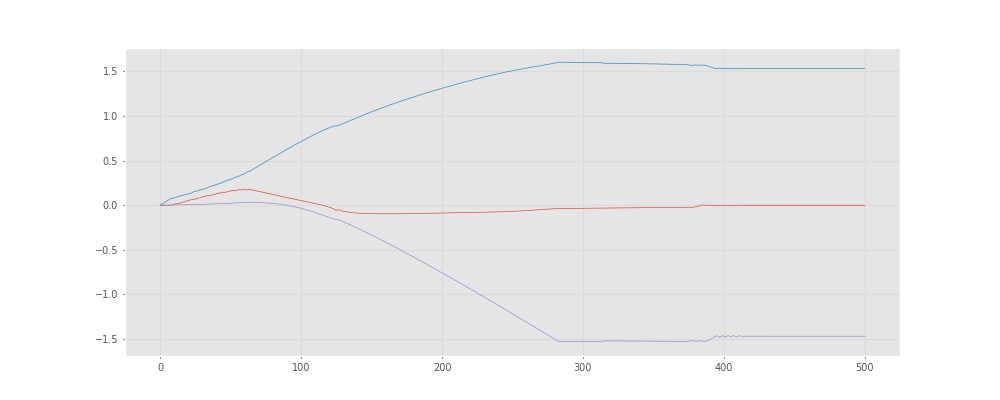

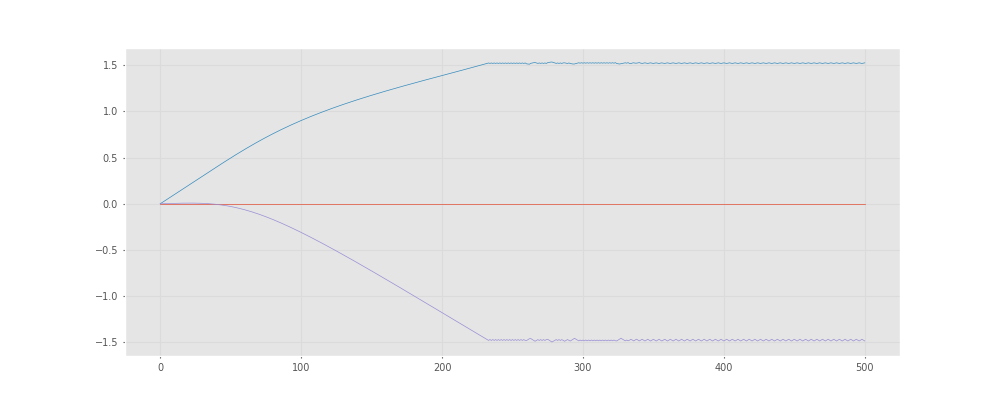

In [28]:
N = 500

q_sol = np.empty((6,N+1))
f_sol = np.empty((6,N+1))
q_alter = np.empty((6,N+1))

alpha = 0.001
q_sol[:,0] = robot.qz
q_alter[:,0]=robot.qz

qCurr=robot.qz
goal=robot.qr
currloc = robot.fkine_all(qCurr) #current location in workspace coords
# print(currloc)
netfr = np.zeros((1,3)) # %initialize force vector
goalloc = robot.fkine_all(goal)

for j in range(0,N):
    Fa=[]
    Je = robot.jacobe(q_sol[:,j])  
    Je_alter = robot.jacobe(q_alter[:,j])  

    q_obs = np.array([0.3, -0.3, 1.2])
    DD=[]
    DD_alter=[]
    
    currloc = robot.fkine_all(q_sol[:,j]) #current location in workspace coords
    curr_alter = robot.fkine_all(q_alter[:,j]) #current location in workspace coords

    goalloc = robot.fkine_all(goal)

    for i in range(1,7): #%make a separate potential field for every joint
        dist_a = currloc[i].t - goalloc[i].t # %calcualte distance in workspace coordaintes from current position to goal position
        # print(currloc[i].t)
        # print(goalloc[i].t)
        Fa=f_att(currloc[i].t,goalloc[i].t,zeta=20, d=0.05)
        # print(currloc[i].t)
        Fa_alter=f_att(curr_alter[i].t,goalloc[i].t,zeta=20, d=0.05)


        F_rep = f_rep(currloc[i].t,[q_obs, 0.1], nu =5, rho=0.2)
        # print(F_rep)
        Fa_np=Fa+F_rep
        Fa_alter_np=Fa_alter
        # print(Fa_np)
        # print(Fa_np.T)

        Jac=Je[0:3,0:i]
        Jac_alter=Je_alter[0:3,0:i]

        # dQ=Jac.T@Fa_np.T
        dQ=np.linalg.pinv(Jac)@Fa_np.T
        dQ_alter=np.linalg.pinv(Jac_alter)@Fa_alter_np.T

        # dQ=(Jac).T@Fa_np.T
        # print("1",dQ)
        # print(np.zeros((1,6-i)))
        dQq=np.hstack((dQ,np.zeros((1,6-i))[0]))
        dQq_alter=np.hstack((dQ_alter,np.zeros((1,6-i))[0]))

        DD.append(dQq)
        DD_alter.append(dQq_alter)

        # print("1",dQq)
        to=[]
        to_alter=[]
    DD=np.array(DD)
    DD_alter=np.array(DD_alter)

    for i in range(6):
            # print(DD[:,0])
        to.append(np.sum(DD[:,i]))
        to_alter.append(np.sum(DD_alter[:,i]))
        # print(DD[:][2]) 
        # print(to)
    to=np.array(to)
    to_alter=np.array(to_alter)

    alp=0.01
    to_alter=dQ_alter
    #np.array([0.3,-0.3,0,0,0,0])
    step=alp*(to)/np.linalg.norm(to)#; %execute gradient descent
    step_alter=alp*(to_alter)/np.linalg.norm(to_alter)#; %execute gradient descent
    # print(step_alter)
    # print(step)
    q_sol[:,j+1] = q_sol[:,j]+step 
    q_alter[:,j+1] = q_alter[:,j]+step_alter 

    # print(q_sol[:,j+1])

print(goal)
# print(q_sol[0][0])    
plt.figure(figsize=(10,4))  
plt.plot(q_sol[0])
plt.plot(q_sol[1])
plt.plot(q_sol[2])

plt.figure(figsize=(10,4))  
plt.plot(q_alter[0])
plt.plot(q_alter[1])
plt.plot(q_alter[2])

# plt.figure(figsize=(10,4))  
# plt.plot(f_sol[0])
# plt.plot(f_sol[1])
# plt.plot(f_sol[2])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


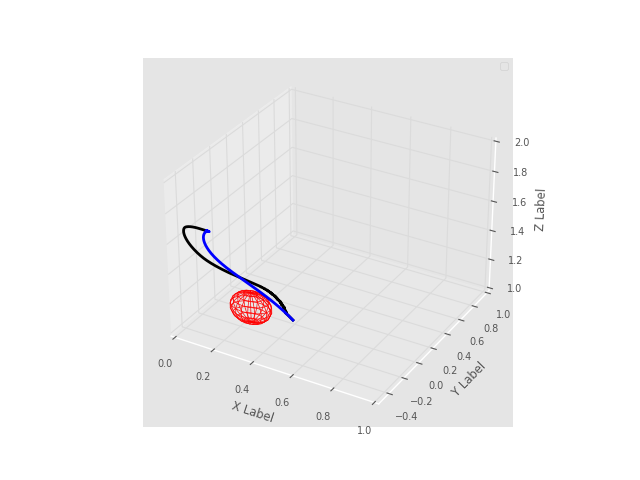

In [29]:
X_cor=[]
Y_cor=[]
Z_cor=[]

X_alter=[]
Y_alter=[]
Z_alter=[]
for i in range(len(q_sol[0])):        
    Coorected_model=robot.fkine([q_sol[0,i],q_sol[1,i],q_sol[2,i],0,0,0])
    model_alter=robot.fkine([q_alter[0,i],q_alter[1,i],q_alter[2,i],0,0,0])

    # Coorected_model=T_base@SE3.Rz(q1)@SE3.Ty(-(d2))@SE3.Ry(-(q2))@SE3.Tx(d3)@SE3.Ry(-(q3))@SE3.Tx(d4)@SE3.Tz(d5)@SE3.Rz(q4)@SE3.Ry((-q5))@SE3.Rz(q6)

    X_cor.append(Coorected_model.t[0])
    Y_cor.append(Coorected_model.t[1])
    Z_cor.append(Coorected_model.t[2])
    
    X_alter.append(model_alter.t[0])
    Y_alter.append(model_alter.t[1])
    Z_alter.append(model_alter.t[2])
    

fig = plt.figure()
ax = plt.axes(projection='3d')


ax.plot3D(X_cor, Y_cor,Z_cor,'k',linewidth=2.0)
ax.plot3D(X_alter, Y_alter,Z_alter,'b', linewidth=2.0)

ax.legend()

import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D


x_center, y_center, z_center = 0.3, -0.3, 1.2
radius = 0.1

u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
x = x_center + radius * np.cos(u) * np.sin(v)
y = y_center + radius * np.sin(u) * np.sin(v)
z = z_center + radius * np.cos(v)
ax.plot_wireframe(x, y, z, color='r')
ax.set_xlim(0, 1)
ax.set_ylim(-0.5, 1)
ax.set_zlim(1, 2)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()


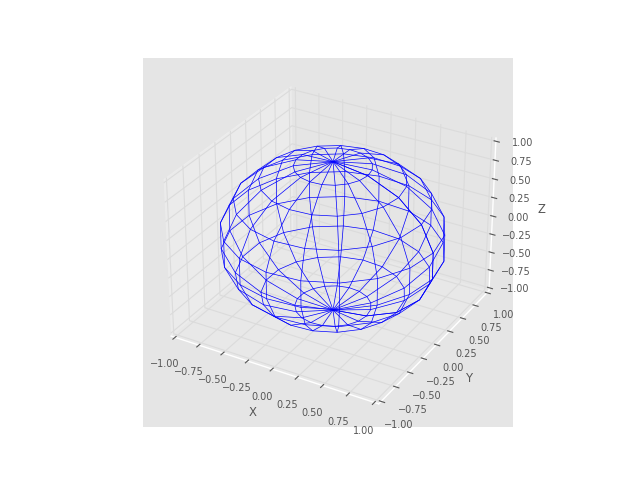

In [92]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the radius of the ball
radius = 1

# Create the x, y, and z coordinates of the ball
u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
x = radius*np.cos(u)*np.sin(v)
y = radius*np.sin(u)*np.sin(v)
z = radius*np.cos(v)

# Create the 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(x, y, z, color='blue')

# Set the plot limits
ax.set_xlim(-radius, radius)
ax.set_ylim(-radius, radius)
ax.set_zlim(-radius, radius)

# Set the plot labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Show the plot
plt.show()


In [32]:
T=robot.fkine(robot.qz)
T0=robot.fkine(robot.qr)
print(T.t)
print(T0.t)

[  0.4521    -0.15    1.104]
[  0.0203    -0.15    1.535]


In [33]:
Fa=[]
Je = robot.jacobe(qCurr)  
q_obs = np.array([0.4, -0.1, 1])
DD=[]
for i in range(1,7): #%make a separate potential field for every joint
    dist_a = currloc[i].t - goalloc[i].t # %calcualte distance in workspace coordaintes from current position to goal position
    #print(currloc[i].t)
    # print(goalloc[i].t)
    Fa=f_att(currloc[i].t,goalloc[i].t,zeta=10, d=0.3)
    # print(currloc[i].t)

    # print(dist_a)
    #if np.linalg.norm(dist_a) > rConToPar : #if the robot is far away from the goal, use a conic attractive field
    #    Fa=(-dist_a/np.linalg.norm(dist_a)) # %Calculate conic attractive force
    #else: #%else, use a parabolic attractive field
    #    Fa=(-zetas[i-1]*dist_a) #Calculate parabolic attractive force
    #Jac=Je[0:3,0:i]
    # Fa_np=np.array(Fa)
    F_rep = f_rep(currloc[i].t,[q_obs, 0.2], nu =5, rho=0.3)
    # print(F_rep)
    Fa_np=Fa-F_rep
    # print(Fa_np)
    # print(Fa_np.T)

    Jac=Je[0:3,0:i]
    # dQ=Jac.T@Fa_np.T
    dQ=np.linalg.pinv(Jac)@Fa_np.T
    # dQ=(Jac).T@Fa_np.T
    # print("1",dQ)
    # print(np.zeros((1,6-i)))
    dQq=np.hstack((dQ,np.zeros((1,6-i))[0]))
    DD.append(dQq)
    print("1",dQq)
to=[]
DD=np.array(DD)
for i in range(6):
    # print(DD[:,0])
    to.append(np.sum(DD[:,i]))
# print(DD[:][2]) 
print(to)
to=np.array(to)
alp=0.1
qLog = qCurr + alp*to/np.linalg.norm(to)#; %execute gradient descent
print(qLog)

1 [       0        0        0        0        0        0]
1 [ -0.0593   0.1741        0        0        0        0]
1 [-0.002645 -0.04141   0.4289        0        0        0]
1 [-0.0006436 0.009747  -0.2669        0        0        0]
1 [-0.0006436 0.009747  -0.2669        0        0        0]
1 [-0.0006436 0.009747  -0.2669        0        0        0]
[-0.0638751216155944, 0.16193443054510512, -0.3719723151285064, 0.0, 0.0, 0.0]
[-0.01555  0.03943 -0.09057        0        0        0]


# 0


In [81]:
from scipy.spatial import distance
def f_att(q,q_f, zeta, d = 0.1):
    
    d2f =  distance.euclidean(q,q_f) 

    if d2f <= d : 
        f_at = -zeta * (q-q_f)

    else: 
        f_at = -(d*zeta*(q-q_f))/d2f 

    return f_at 



def f_rep(q,obs, nu, rho=0.01): 

    center,radius = obs
    d2o =  distance.euclidean(q,center) 
    d2b = d2o - radius

    dgrad = (q-center)/d2o
    # print(d2o)

    if d2o <= rho : 
        f_rep = nu*((1/d2b)-(1/rho))*(1/d2b**2)*dgrad
    else: 
        f_rep = np.zeros((1,3))
        f_rep=f_rep[0]

    
    return f_rep 

[       0    1.571   -1.571        0        0        0]


C:\Users\ahmad\AppData\Local\Temp\ipykernel_20076\2602136271.py:97: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(10,4))


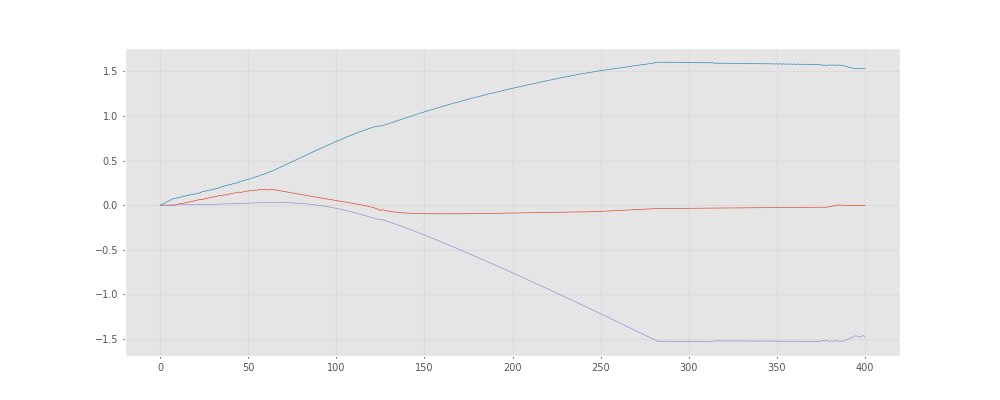

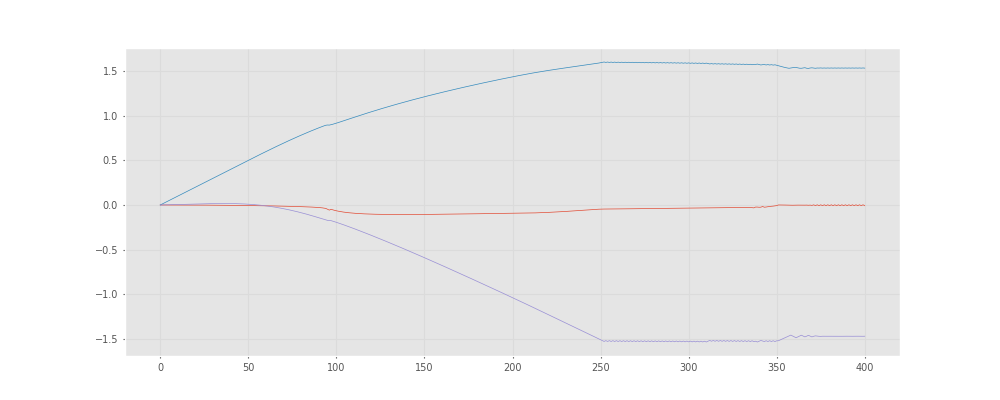

In [82]:
N = 400

q_sol = np.empty((6,N+1))

q_alter = np.empty((6,N+1))

alpha = 0.01
q_sol[:,0] = robot.qz
q_alter[:,0]=robot.qz

q_Curr=robot.qz
goal=robot.qr
curr_loc = robot.fkine_all(q_Curr) #current location in workspace coords


# goal_loc = robot.fkine_all(goal)

for j in range(0,N):
    Fa=[]
    Je = robot.jacobe(q_sol[:,j])  
    Je_alter = robot.jacobe(q_alter[:,j])  

    q_obs = np.array([0.3, -0.3, 1.2])
    
    dQ_v_all_joint=[]
    dQ_v_all_joint_alter=[]
    
    currloc = robot.fkine_all(q_sol[:,j]) #current location in workspace coords
    curr_alter = robot.fkine_all(q_alter[:,j]) #current location in workspace coords

    goal_loc = robot.fkine_all(goal)

    for i in range(1,7): #%make a separate potential field for every joint

        Fa=f_att(currloc[i].t,goal_loc[i].t,zeta=20, d=0.05)

        Fa_alter=f_att(curr_alter[i].t,goal_loc[i].t,zeta=20, d=0.05)


        F_rep = f_rep(currloc[i].t,[q_obs, 0.1], nu =5, rho=0.2)
        #
        
        Fa_np=Fa+F_rep
        
        Fa_alter_np=Fa_alter

        #
        Jac=Je[0:3,0:i]
        Jac_alter=Je_alter[0:3,0:i]

        
        #
        dQ_v=np.linalg.pinv(Jac)@Fa_np.T
        dQ_v_alter=np.linalg.pinv(Jac_alter)@Fa_alter_np.T

        #
        dQ_v=np.hstack((dQ_v,np.zeros((1,6-i))[0]))
        dQ_v_alter=np.hstack((dQ_v_alter,np.zeros((1,6-i))[0]))
        #
        dQ_v_all_joint.append(dQ_v)
        dQ_v_all_joint_alter.append(dQ_v_alter)


    total_dvq=[]
    total_dvq_alter=[]
    dQ_v_all_joint=np.array(dQ_v_all_joint)
    dQ_v_all_joint_alter=np.array(dQ_v_all_joint_alter)

    for i in range(6):

        total_dvq.append(np.sum(dQ_v_all_joint[:,i]))
        total_dvq_alter.append(np.sum(dQ_v_all_joint_alter[:,i]))


    total_dvq=np.array(total_dvq)
    total_dvq_alter=np.array(total_dvq_alter)


    step=alpha*(total_dvq)/np.linalg.norm(total_dvq)#; %execute gradient descent
    step_alter=alpha*(total_dvq_alter)/np.linalg.norm(total_dvq_alter)#; %execute gradient descent

    
    q_sol[:,j+1] = q_sol[:,j]+step 
    q_alter[:,j+1] = q_alter[:,j]+step_alter 





print(goal)

plt.figure(figsize=(10,4))  
plt.plot(q_sol[0])
plt.plot(q_sol[1])
plt.plot(q_sol[2])

plt.figure(figsize=(10,4))  
plt.plot(q_alter[0])
plt.plot(q_alter[1])
plt.plot(q_alter[2])



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


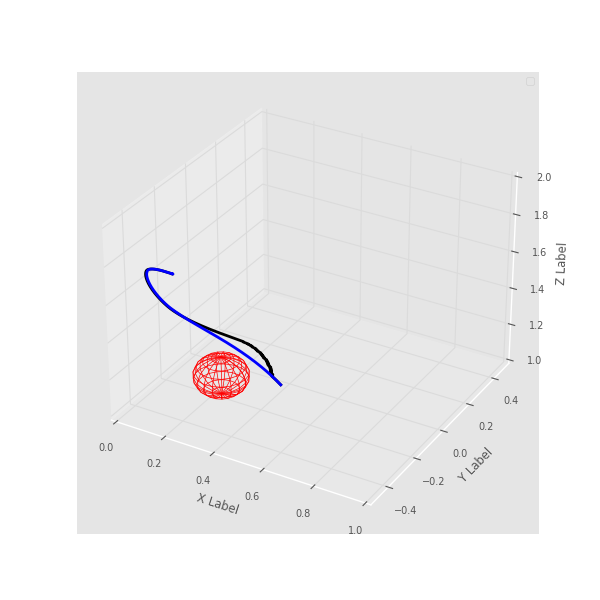

In [83]:
X_w_obs=[]
Y_w_obs=[]
Z_w_obs=[]

X_alter=[]
Y_alter=[]
Z_alter=[]
for i in range(len(q_sol[0])):        
    Path_with_obs=robot.fkine([q_sol[0,i],q_sol[1,i],q_sol[2,i],0,0,0])
    Path_alter=robot.fkine([q_alter[0,i],q_alter[1,i],q_alter[2,i],0,0,0])


    X_w_obs.append(Path_with_obs.t[0])
    Y_w_obs.append(Path_with_obs.t[1])
    Z_w_obs.append(Path_with_obs.t[2])
    
    X_alter.append(Path_alter.t[0])
    Y_alter.append(Path_alter.t[1])
    Z_alter.append(Path_alter.t[2])
    

plt.figure(figsize=(6,6))
ax = plt.axes(projection='3d')


ax.plot3D(X_w_obs, Y_w_obs,Z_w_obs,'k',linewidth=2.0)
ax.plot3D(X_alter, Y_alter,Z_alter,'b', linewidth=2.0)

ax.legend()

import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D


x_center, y_center, z_center = 0.3, -0.3, 1.2
radius = 0.1

u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
x = x_center + radius * np.cos(u) * np.sin(v)
y = y_center + radius * np.sin(u) * np.sin(v)
z = z_center + radius * np.cos(v)
ax.plot_wireframe(x, y, z, color='r')
ax.set_xlim(0, 1)
ax.set_ylim(-0.5, 0.5)
ax.set_zlim(1, 2)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()


# 1

In [84]:
from scipy.spatial import distance
def f_att(q,q_f, zeta, d = 0.1):
    
    d2f =  distance.euclidean(q,q_f) 

    if d2f <= d : 
        f_at = -zeta * (q-q_f)

    else: 
        f_at = -(d*zeta*(q-q_f))/d2f 

    return f_at 



def f_rep(q,obs, nu, rho=0.01): 

    center,radius = obs
    d2o =  distance.euclidean(q,center) 
    d2b = d2o - radius

    dgrad = (q-center)/d2o
    # print(d2o)

    if d2o <= rho : 
        f_rep = nu*((1/d2b)-(1/rho))*(1/d2b**2)*dgrad
    else: 
        f_rep = np.zeros((1,3))
        f_rep=f_rep[0]

    
    return f_rep 

In [114]:
print(robot.fkine(robot.qr))
T=robot.fkine(robot.qr)

   1         0         0         0.0203    
   0         1         0        -0.15      
   0         0         1         1.535     
   0         0         0         1         



In [113]:
# print(robot.ikine_a(T,config='rdn'))
# print(robot.qz)

# print(robot.ikine_a(T,config='rdn'))
print(robot.ikine_a(T))

print(robot.qr)

IKsolution(q=array([  0.2689,    1.571,   -1.477,        0, -0.09396,  -0.2689]), success=True, reason='')
[       0    1.571   -1.571        0        0        0]


[       0        0        0        0        0        0]
[       0    1.524   -1.477        0 -0.04695        0]
   1         0         0         0.0203    
   0         1         0        -0.15      
   0         0         1         1.535     
   0         0         0         1         

   0.9986    0        -0.05294   0.01916   
   0         1         0        -0.15      
   0.05294   0         0.9986    1.535     
   0         0         0         1         



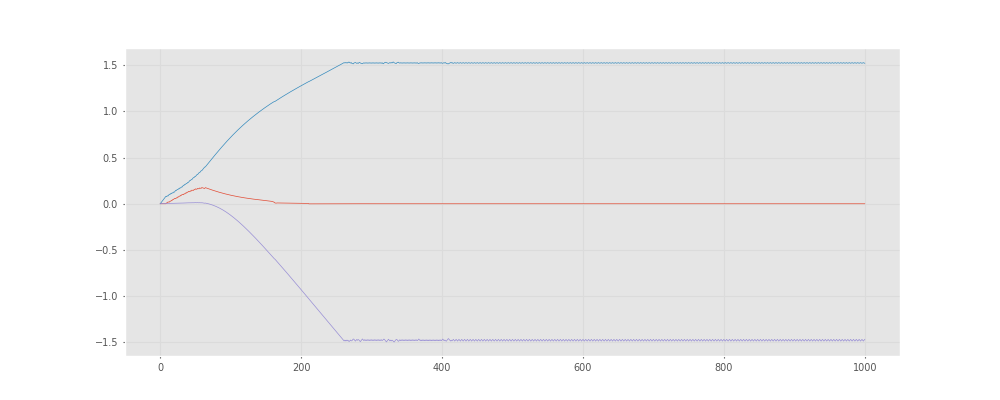

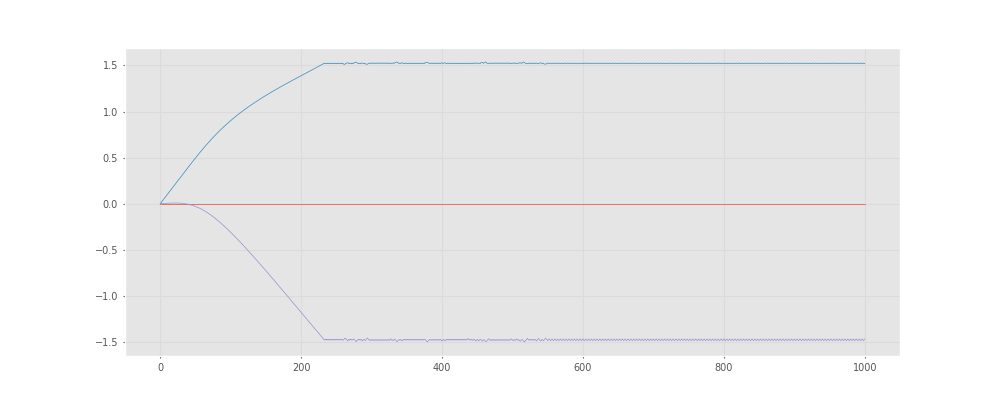

In [139]:
N = 1000

q_sol = np.empty((6,N+1))

q_alter = np.empty((6,N+1))

alpha = 0.01

T_i=robot.fkine(robot.qz)
T_f=robot.fkine(robot.qr)


q_i=robot.ikine_a(T_i,config='rdn').q
q_f=robot.ikine_a(T_f,config='rdn').q
print(q_i)
# q_sol[:,0] = robot.qz
# q_alter[:,0]=robot.qz

# q_Curr=robot.qz
# goal=robot.qr


q_sol[:,0] = q_i
q_alter[:,0]=q_i
q_Curr=q_i
goal=q_f


curr_loc = robot.fkine_all(q_Curr) #current location in workspace coords

# goal_loc = robot.fkine_all(goal)

for j in range(0,N):
    Fa=[]
    Je = robot.jacobe(q_sol[:,j])  
    Je_alter = robot.jacobe(q_alter[:,j])  

    q_obs = np.array([0.3, -0.3, 1.2])
    
    dQ_v_all_joint=[]
    dQ_v_all_joint_alter=[]
    
    currloc = robot.fkine_all(q_sol[:,j]) #current location in workspace coords
    curr_alter = robot.fkine_all(q_alter[:,j]) #current location in workspace coords

    goal_loc = robot.fkine_all(goal)
    F_rep=0
    for i in range(1,7): #%make a separate potential field for every joint
        F_rep += f_rep(currloc[i].t,[q_obs, 0.1], nu =5, rho=0.2)
    Fa=f_att(currloc[6].t,goal_loc[6].t,zeta=20, d=0.05)

    Fa_alter=f_att(curr_alter[6].t,goal_loc[6].t,zeta=20, d=0.05)


        #
        
    Fa_np=Fa+F_rep
        
    Fa_alter_np=Fa_alter

        #
    Jac=Je[0:3,0:6]
    Jac_alter=Je_alter[0:3,0:6]

        
        #
    dQ_v=np.linalg.pinv(Jac)@Fa_np.T
    dQ_v_alter=np.linalg.pinv(Jac_alter)@Fa_alter_np.T

        #
    dQ_v=np.hstack((dQ_v,np.zeros((1,6-i))[0]))
    dQ_v_alter=np.hstack((dQ_v_alter,np.zeros((1,6-i))[0]))
        #



    step=alpha*(dQ_v)/np.linalg.norm(dQ_v)#; %execute gradient descent
    step_alter=alpha*(dQ_v_alter)/np.linalg.norm(dQ_v_alter)#; %execute gradient descent

    
    q_sol[:,j+1] = q_sol[:,j]+step 
    q_alter[:,j+1] = q_alter[:,j]+step_alter 





print(goal)

plt.figure(figsize=(10,4))  
plt.plot(q_sol[0])
plt.plot(q_sol[1])
plt.plot(q_sol[2])

plt.figure(figsize=(10,4))  
plt.plot(q_alter[0])
plt.plot(q_alter[1])
plt.plot(q_alter[2])


# Path_with_obs=robot.fkine([q_sol[0,i],q_sol[1,i],q_sol[2,i],0,0,0])
    # Path_alter=robot.fkine([q_alter[0,i],q_alter[1,i],q_alter[2,i],0,0,0])


print(robot.fkine(goal))
print(robot.fkine([q_alter[0,-1],q_alter[1,-1],q_alter[2,-1],0,0,0]))


In [3]:

print(path[1])
#print(q_sol[0,3])

[  0.3999 8.96e-05   0.5941]


Or: [     0.4        0      0.6]
[     0.4 1.353e-07      0.6]
Or: [     0.4 0.0003603   0.5995]
[     0.4 0.0003604   0.5995]
Or: [  0.3999 0.001344   0.5982]
[  0.3999 0.001344   0.5982]
Or: [  0.3999 0.002819   0.5963]
[  0.3999 0.002819   0.5963]
Or: [  0.3998 0.004673   0.5937]
[  0.3998 0.004673   0.5937]
Or: [  0.3997  0.00681   0.5908]
[  0.3996  0.00681   0.5908]
Or: [  0.3995 0.009149   0.5875]
[  0.3995 0.009149   0.5875]
Or: [  0.3994  0.01162   0.5838]
[  0.3994  0.01162   0.5838]
Or: [  0.3993  0.01417     0.58]
[  0.3993  0.01417     0.58]
Or: [  0.3991  0.01674   0.5759]
[  0.3991  0.01674   0.5759]
Or: [   0.399   0.0193   0.5716]
[   0.399   0.0193   0.5716]
Or: [  0.3989  0.02182   0.5672]
[  0.3989  0.02182   0.5672]
Or: [  0.3988  0.02427   0.5627]
[  0.3988  0.02427   0.5627]
Or: [  0.3986  0.02663   0.5581]
[  0.3986  0.02662   0.5581]
Or: [  0.3985  0.02888   0.5533]
[  0.3985  0.02888   0.5533]
Or: [  0.3984  0.03102   0.5485]
[  0.3984  0.03102   0.5485]
Or: [

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[  0.3999  0.00208  -0.1752]
Or: [  0.3999 0.001684  -0.1799]
[  0.3999 0.001683  -0.1799]
Or: [  0.3999  0.00131  -0.1844]
[  0.3999  0.00131  -0.1844]
Or: [     0.4 0.0009651  -0.1885]
[     0.4 0.0009649  -0.1885]
Or: [     0.4 0.0006565  -0.1922]
[     0.4 0.0006566  -0.1922]
Or: [     0.4 0.0003933  -0.1953]
[     0.4 0.0003935  -0.1953]
Or: [     0.4 0.0001866  -0.1978]
[     0.4 0.0001869  -0.1978]
Or: [     0.4 4.989e-05  -0.1994]
[     0.4 5.02e-05  -0.1994]
Or: [     0.4        0     -0.2]
[     0.4 3.235e-07     -0.2]
[0.3999991676798189, 0.3999807086157026, 0.3999303102761488, 0.3998546175119643, 0.3997592459468346, 0.39964882853533756, 0.399526993959561, 0.39939616564805863, 0.3992759083196811, 0.39914407723120987, 0.3990124486481735, 0.39888210177945044, 0.3987530983606913, 0.3986226178134118, 0.39851656701615995, 0.3984014971896453, 0.39828736676565896, 0.39818644780977186, 0.3980807724226312, 0.3979811036119088, 0.39788001299494324, 0.397778229319056, 0.3976713857870615

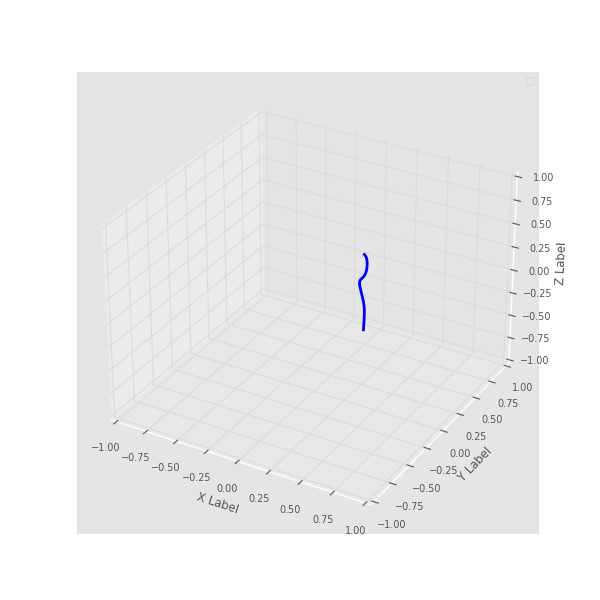

In [12]:
robot=rtb.models.DH.UR10()

X_w_obs=[]
Y_w_obs=[]
Z_w_obs=[]

X_alter=[]
Y_alter=[]
Z_alter=[]
q_sol=path
for i in range(len(q_sol)):    

    TT= np.array([[1,   0,  0,  q_sol[i][0]],
                   [0,   1,  0,  q_sol[i][1]],
                   [0,   0,  1,  q_sol[i][2]],
                   [0,   0,  0,  1]])

    TT=SE3(TT, check=False)
    #print(TT)
    print("Or:",q_sol[i])
    real_sol = robot.ikine_LMS(TT)  
    #print(real_sol[0])
    Path_alter=robot.fkine(real_sol[0])
    print(Path_alter.t)

    #Path_alter=robot.fkine([q_sol[i][0],q_sol[i][1],q_sol[i][2],robot.qz[3],robot.qz[4],robot.qz[5]])
    #Path_alter=robot.fkine([q_alter[0,i],q_alter[1,i],q_alter[2,i],robot.qr[3],robot.qr[4],robot.qr[5]])


    #X_w_obs.append(Path_with_obs.t[0])
    #Y_w_obs.append(Path_with_obs.t[1])
    #Z_w_obs.append(Path_with_obs.t[2])
    
    X_alter.append(Path_alter.t[0])
    Y_alter.append(Path_alter.t[1])
    Z_alter.append(Path_alter.t[2])

print(X_alter)    
plt.figure(figsize=(6,6))
ax = plt.axes(projection='3d')


ax.plot3D(X_alter, Y_alter,Z_alter,'b', linewidth=2.0)

ax.legend()

import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D


x_center, y_center, z_center = 0.3, -0.3, 1.2
radius = 0.1

# u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
# x = x_center + radius * np.cos(u) * np.sin(v)
# y = y_center + radius * np.sin(u) * np.sin(v)
# z = z_center + radius * np.cos(v)
# ax.plot_wireframe(x, y, z, color='r')
ax.set_xlim(-1, 1)#
ax.set_ylim(-1, 1)#
ax.set_zlim(-1, 1)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


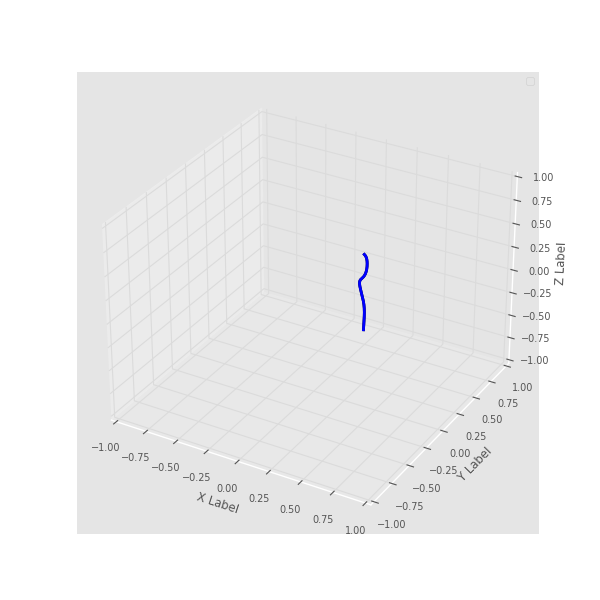

In [13]:
X = []
Y = []
Z = []
for point in path:
    X.append(point[0])
    Y.append(point[1])
    Z.append(point[2])

plt.figure(figsize=(6,6))
ax = plt.axes(projection='3d')



ax.plot3D(X, Y,Z,'k',linewidth=2.0)
ax.plot3D(X_alter, Y_alter,Z_alter,'b', linewidth=2.0)

ax.legend()

import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D


x_center, y_center, z_center = 0.3, -0.3, 1.2
radius = 0.1

# u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
# x = x_center + radius * np.cos(u) * np.sin(v)
# y = y_center + radius * np.sin(u) * np.sin(v)
# z = z_center + radius * np.cos(v)
# ax.plot_wireframe(x, y, z, color='r')
ax.set_xlim(-1, 1)#
ax.set_ylim(-1, 1)#
ax.set_zlim(-1, 1)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()

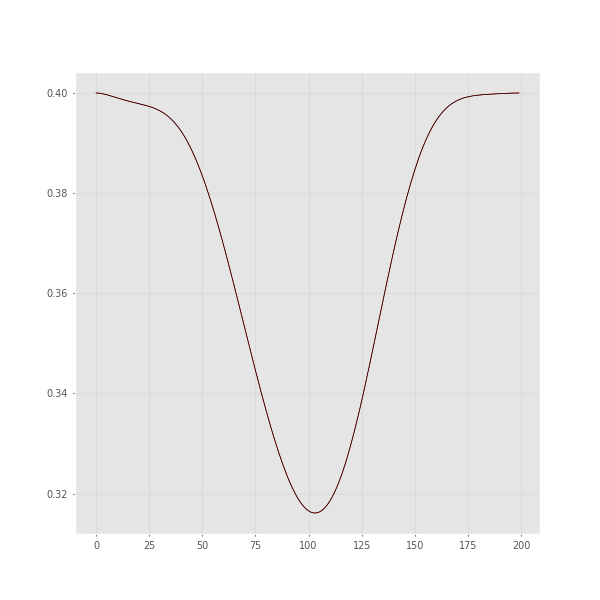

In [14]:
plt.figure(figsize=(6,6))

plt.plot(X,'r')
plt.plot(X_alter,'k')

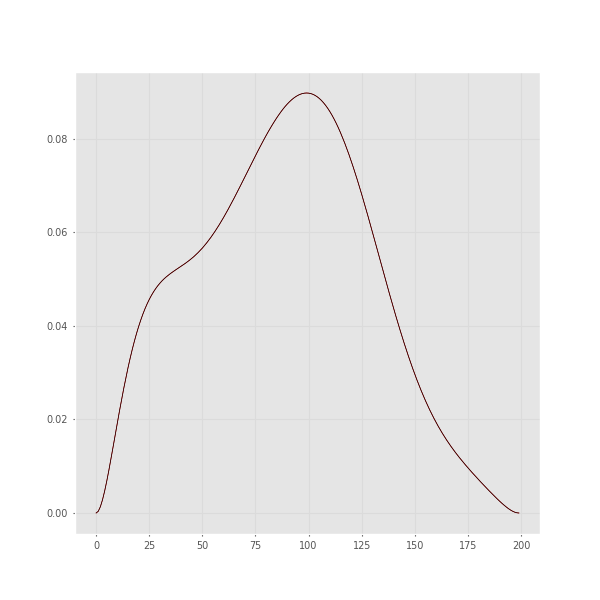

In [17]:
plt.figure(figsize=(6,6))
plt.plot(Y,'r')
plt.plot(Y_alter,'k')

# Motion Control

In [36]:
# Remove the fraction consideration from the dynamic model
robot_n=robot.nofriction()
qddn = robot_n.accel(robot.qn, 0.1*np.ones((6,)), np.array([5,5,5,0,0,0]))
print(qddn)


[  0.4973   -6.271   0.7732  -0.2074  -0.3347  -0.1112]


In [37]:
T0=10
N1=100
t1=np.linspace(0,T0,N1+1)


In [73]:
# generate a trajectory in joint space between an initial and final configuration
traj = robot_n.jtraj(robot_n.fkine(robot_n.qr), robot_n.fkine(robot_n.qz), t1)
print(traj.qd)

[[       0        0        0        0        0        0]
 [0.0006562 1.35e-05 0.0004342        0 -0.0004477 -0.0006562]
 [0.002572 5.293e-05 0.001702        0 -0.001755 -0.002572]
 [ 0.00567 0.0001167 0.003752        0 -0.003868 -0.00567]
 [0.009872 0.0002032 0.006533        0 -0.006736 -0.009872]
 [ 0.01511 0.0003109 0.009996        0 -0.01031 -0.01511]
 [  0.0213 0.0004383  0.01409        0 -0.01453  -0.0213]
 [ 0.02837 0.0005839  0.01878        0 -0.01936 -0.02837]
 [ 0.03627 0.0007463    0.024        0 -0.02475 -0.03627]
 [ 0.04491 0.0009241  0.02972        0 -0.03064 -0.04491]
 [ 0.05423 0.001116  0.03589        0   -0.037 -0.05423]
 [ 0.06417  0.00132  0.04246        0 -0.04378 -0.06417]
 [ 0.07466 0.001536  0.04941        0 -0.05094 -0.07466]
 [ 0.08564 0.001762  0.05667        0 -0.05844 -0.08564]
 [ 0.09705 0.001997  0.06423        0 -0.06622 -0.09705]
 [  0.1088  0.00224  0.07202        0 -0.07426  -0.1088]
 [  0.1209 0.002489  0.08003        0 -0.08252  -0.1209]
 [  0.1333 0

In [76]:
# print(q_alter)
# print(len(np.ones(len(q_alter[0]))))
# print(len(q_alter.T))
# 0.01*np.ones(len(q_alter[0])-1)
tsegment0=np.hstack((0.1,0.01*np.ones(len(q_alter[0])-3),0.1))
print(len(tsegment0))
# traj0=rtb.tools.trajectory.mstraj(q_alter.T, dt=0.01, tacc=0.001,tsegment=0.01*np.ones(len(q_alter[0])-1))
traj0=rtb.tools.trajectory.mstraj(q_alter.T, dt=0.01, tacc=0.001,tsegment=tsegment0,verbose=False)

print(traj0.qd)
# print(traj0.plot())
# traj0.plot()

400
None


AttributeError: 'Trajectory' object has no attribute 'dq'

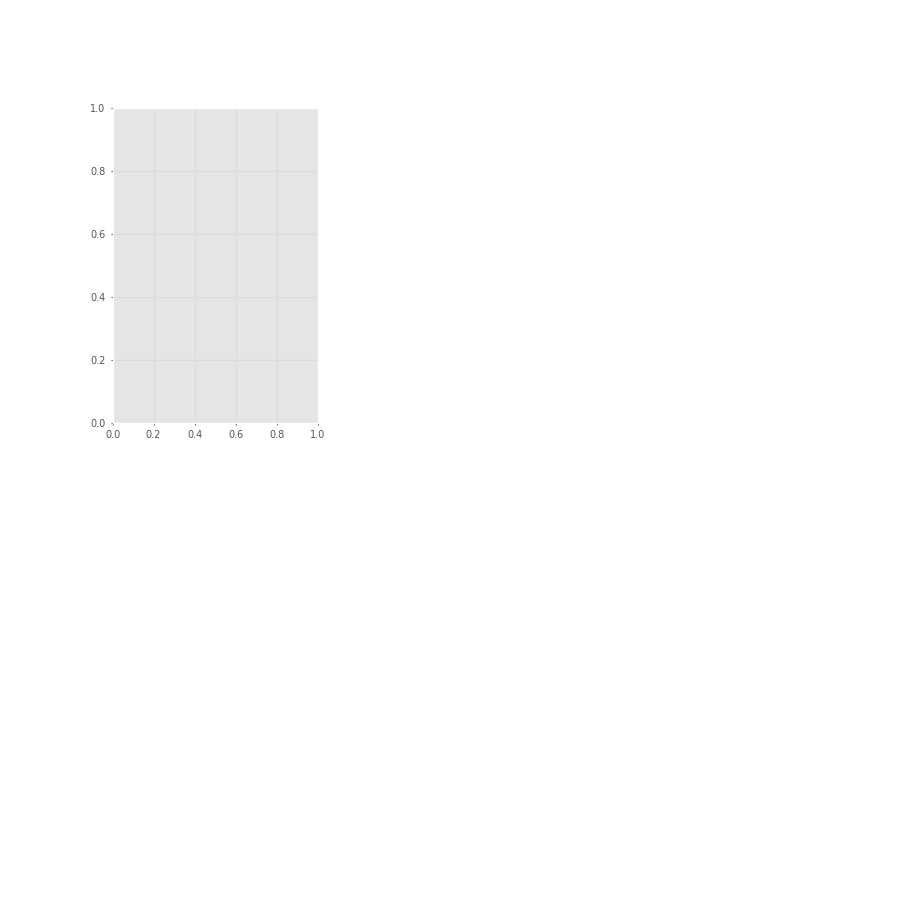

In [40]:
# q1, q2,q3, q4,q5, q6 = x_nl[:,0],x_nl[:,1], x_nl[:,2],x_nl[:,3], x_nl[:,4],x_nl[:,5],
# dq1, dq2,dq3, dq4,dq5, dq6 = x_nl[:,6],x_nl[:,7], x_nl[:,8],x_nl[:,9], x_nl[:,10],x_nl[:,11],

plt.figure(figsize=(9,9))
plt.subplot(2, 3, 1)
# plt.title(title)
# plt.plot(t1, q1, linewidth=2.0, color = 'red')
plt.plot(traj.dq[:,2], linewidth=2.0, color = 'blue')
plt.grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
plt.grid(True)
# plt.xlim([0, T0])
plt.ylabel(r'${q_1} $')

# plt.subplot(2, 3, 2)
# plt.plot(t1, q2, linewidth=2.0, color = 'red')
# plt.plot(t1, traj.q[:,1], linewidth=2.0, color = 'blue')
# plt.grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
# plt.grid(True)
# plt.xlim([0, T0])
# plt.ylabel(r'${q_2}$')
        
# plt.subplot(2, 3, 3)
# plt.plot(t1, q3, linewidth=2.0, color = 'red')
# plt.plot(t1, traj.q[:,2], linewidth=2.0, color = 'blue')
# plt.grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
# plt.grid(True)
# plt.xlim([0, T0])
# plt.ylabel(r'${q_3}$')
# plt.xlabel(r'Time $t$')

# plt.subplot(2, 3, 4)
# plt.plot(t1, q4, linewidth=2.0, color = 'red')
# plt.plot(t1, traj.q[:,3], linewidth=2.0, color = 'blue')
# plt.grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
# plt.grid(True)
# plt.xlim([0, T0])
# plt.ylabel(r'${q_4}$')

# plt.subplot(2, 3, 5)
# plt.plot(t1, q5, linewidth=2.0, color = 'red')
# plt.plot(t1, traj.q[:,4], linewidth=2.0, color = 'blue')
# plt.grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
# plt.grid(True)
# plt.xlim([0, T0])
# plt.ylabel(r' ${q_5}$')
        
# plt.subplot(2, 3, 6)
# plt.plot(t1, q6, linewidth=2.0, color = 'red')
# plt.plot(t1, traj.q[:,5], linewidth=2.0, color = 'blue')
# plt.grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
# plt.grid(True)
# plt.xlim([0, T0])
# plt.ylabel(r'${q_6}$')
# plt.xlabel(r'Time $t$')

plt.show()  

In [42]:
# computed Torque Control
def ctc_control(x,t):
    q_r,dq_r=x[0:6],x[6:]
    Kp=100*np.eye(6)
    Kd=100*np.eye(6)
    # Kp=100*np.diag([1,1,1,1,1,1])
    # Kd=100*np.diag([0.4,1,0.2,1,0.5,0.5])
    M=robot_n.inertia(q_r)
    G=robot_n.gravload(q_r)
    C=robot_n.coriolis(q_r,dq_r)
    i=int(t*(N1/T0))
    q_des=traj.q[i]
    qd_des=traj.qd[i]
    qdd_des=traj.qdd[i]
    u=M@(qdd_des+Kd@(qd_des-dq_r)+Kp@(q_des-q_r))+C@dq_r+G
    return u

In [41]:
# Feedforward Control
def fw_control(x,t):
    q_r,dq_r=x[0:6],x[6:]
    Kp=100*np.eye(6)
    Kd=100*np.eye(6)
    
    i=int(t*(N1/T0))

    q_des=traj.q[i]
    qd_des=traj.qd[i]
    qdd_des=traj.qdd[i]
    
    M=robot_n.inertia(q_des)
    G=robot_n.gravload(q_des)
    C=robot_n.coriolis(q_des,qd_des)

    u=Kd@(qd_des-dq_r)+Kp@(q_des-q_r)+M@qdd_des+C@q_des+G
    return u

In [43]:
# Feedforward +PD  Control
def fw_pd_control(x,t):
    q_r,dq_r=x[0:6],x[6:]
    Kp=100*np.eye(6)
    Kd=100*np.eye(6)
    
    i=int(t*(N1/T0))

    q_des=traj.q[i]
    qd_des=traj.qd[i]
    qdd_des=traj.qdd[i]
    
    M=robot_n.inertia(q_r)
    G=robot_n.gravload(q_r)
    C=robot_n.coriolis(q_r,dq_r)

    u=Kd@(qd_des-dq_r)+Kp@(q_des-q_r)+M@qdd_des+C@q_des+G
    return u

In [44]:
# robot dynamic
def f(x, u):
    q,dq=x[0:6],x[6:]
    ddq=robot_n.accel(q,dq, u)
    dx=np.hstack((dq,ddq))
    return dx

In [45]:
def sys_ode(x, t):
    u=ctc_control(x,t)
    dx = f(x, u)
    return dx

In [46]:
# simulate
from scipy.integrate import odeint # import integrator routine
state_0=np.array(np.hstack((traj.q[0]+0.1*np.ones((6,)),traj.qd[0])))
# print(state_0)
x_nl = odeint(sys_ode, state_0, t1) 

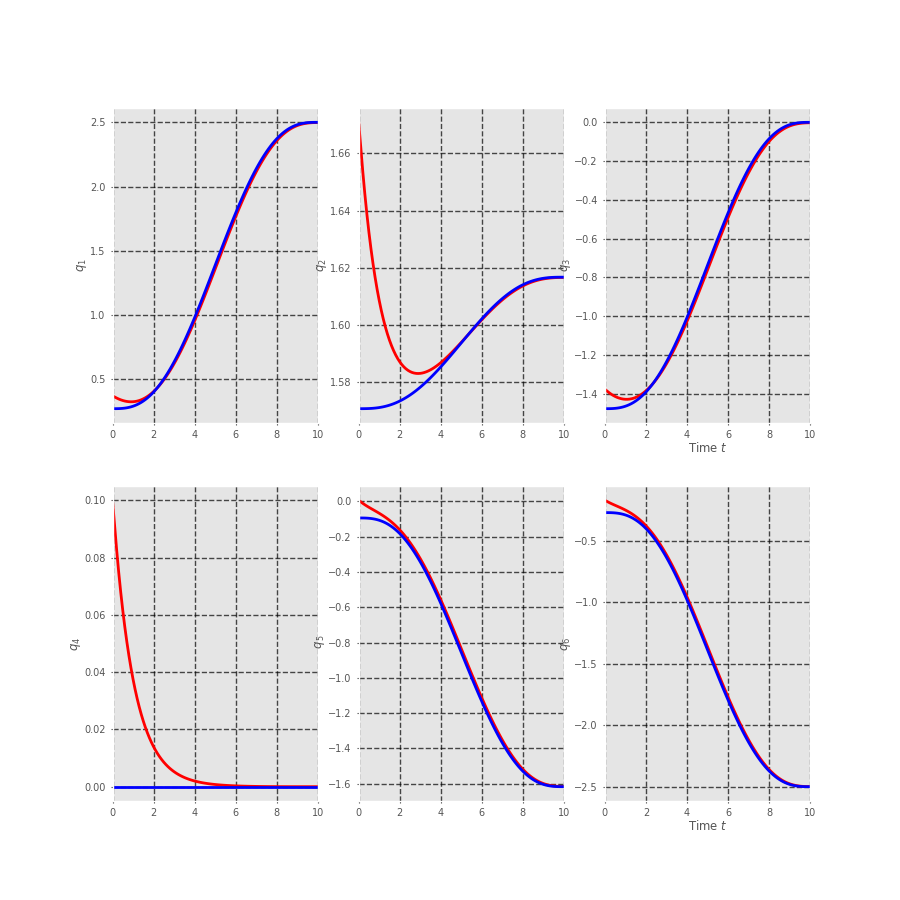

In [49]:
q1, q2,q3, q4,q5, q6 = x_nl[:,0],x_nl[:,1], x_nl[:,2],x_nl[:,3], x_nl[:,4],x_nl[:,5],
dq1, dq2,dq3, dq4,dq5, dq6 = x_nl[:,6],x_nl[:,7], x_nl[:,8],x_nl[:,9], x_nl[:,10],x_nl[:,11],

plt.figure(figsize=(9,9))
plt.subplot(2, 3, 1)
# plt.title(title)
plt.plot(t1, q1, linewidth=2.0, color = 'red')
plt.plot(t1, traj.q[:,0], linewidth=2.0, color = 'blue')
plt.grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
plt.grid(True)
plt.xlim([0, T0])
plt.ylabel(r'${q_1} $')

plt.subplot(2, 3, 2)
plt.plot(t1, q2, linewidth=2.0, color = 'red')
plt.plot(t1, traj.q[:,1], linewidth=2.0, color = 'blue')
plt.grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
plt.grid(True)
plt.xlim([0, T0])
plt.ylabel(r'${q_2}$')
        
plt.subplot(2, 3, 3)
plt.plot(t1, q3, linewidth=2.0, color = 'red')
plt.plot(t1, traj.q[:,2], linewidth=2.0, color = 'blue')
plt.grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
plt.grid(True)
plt.xlim([0, T0])
plt.ylabel(r'${q_3}$')
plt.xlabel(r'Time $t$')

plt.subplot(2, 3, 4)
plt.plot(t1, q4, linewidth=2.0, color = 'red')
plt.plot(t1, traj.q[:,3], linewidth=2.0, color = 'blue')
plt.grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
plt.grid(True)
plt.xlim([0, T0])
plt.ylabel(r'${q_4}$')

plt.subplot(2, 3, 5)
plt.plot(t1, q5, linewidth=2.0, color = 'red')
plt.plot(t1, traj.q[:,4], linewidth=2.0, color = 'blue')
plt.grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
plt.grid(True)
plt.xlim([0, T0])
plt.ylabel(r' ${q_5}$')
        
plt.subplot(2, 3, 6)
plt.plot(t1, q6, linewidth=2.0, color = 'red')
plt.plot(t1, traj.q[:,5], linewidth=2.0, color = 'blue')
plt.grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
plt.grid(True)
plt.xlim([0, T0])
plt.ylabel(r'${q_6}$')
plt.xlabel(r'Time $t$')

plt.show()  

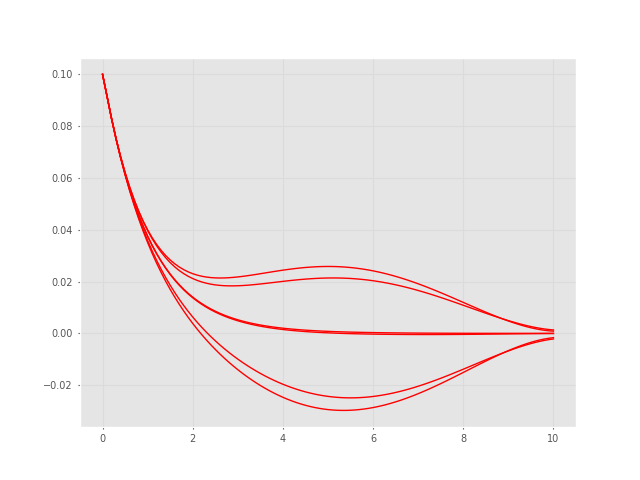

In [50]:
fig=plt.figure()
plt.plot(t1, q1-traj.q[:,0],'r', linewidth=1.0)
plt.plot(t1, q2-traj.q[:,1],'r', linewidth=1.0)
plt.plot(t1, q3-traj.q[:,2],'r', linewidth=1.0)
plt.plot(t1, q4-traj.q[:,3],'r', linewidth=1.0)
plt.plot(t1, q5-traj.q[:,4],'r', linewidth=1.0)
plt.plot(t1, q6-traj.q[:,5],'r', linewidth=1.0)

plt.show()

In [ ]:
# # plot theta1 and theta2

# q1, q2,q3, q4,q5, q6 = x_nl[:,0],x_nl[:,1], x_nl[:,2],x_nl[:,3], x_nl[:,4],x_nl[:,5]




# # figure()
# fig = plt.figure()

# plt.plot(t1, q1,'b', linewidth=1.0)
# plt.plot(t1, traj.q[:,0],'r', linewidth=1.0)
# # plt.plot(t1, q1,'b', linewidth=2.0)
# # plt.plot(t1, q1,'b', linewidth=2.0)

# # plot(t1, theta1_t,'k',label=r'$\theta_1^{des}$',linestyle='--', linewidth=2.0)

# plt.show()
# fig=plt.figure()
# plt.plot(t1, q1-traj.q[:,0],'r', linewidth=1.0)
# plt.show()


# # fig = plt.figure()
# # title(r'$\theta_2$')
# # plot(t1, q2,'r', label=r'$\theta_2$',linewidth=2.0)
# # # plot(t1, theta2_t,'k',label=r'$\theta_2^{des}$',linestyle='--', linewidth=2.0)
# # xlim([0, T])
# # grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
# # grid(True)
# # ylabel(r'$\theta_2$ (rad)')
# # xlabel(r'Time $t$ (s)')
# # legend(loc='best')
# # show()
